In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [227]:
df = pd.read_csv('AllCombined.csv', delimiter='\t', parse_dates=['DateTime'], index_col=False, usecols = ['DateTime', 'CorridorName', 'StopName', 'VehicleID']);
print ('Data Loaded')
print (df.info())

Data Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28869 entries, 0 to 28868
Data columns (total 4 columns):
DateTime        28869 non-null datetime64[ns]
CorridorName    28869 non-null object
StopName        28869 non-null object
VehicleID       28869 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 902.2+ KB
None


In [232]:
df.shape

(28869, 4)

In [45]:
df.head()

,DateTime,CorridorName,StopName,VehicleID
0,2018-10-02 07:35:00,DCL Outbound-WS Inbound,Main and Murray IB,527
1,2018-10-02 07:35:00,DCL Outbound-WS Inbound,Main and Murray IB,527
2,2018-10-02 07:37:00,DCL Outbound-WS Inbound,Main and Mather,527
3,2018-10-02 07:37:00,DCL Outbound-WS Inbound,Main and Mather,527
4,2018-10-02 07:37:00,DCL Outbound-WS Inbound,Main and Mather,527


In [21]:
df1 = pd.read_csv('DCLOUT/a.csv', skiprows=1, parse_dates=['DateTime']);
print ('Data Loaded')
print (df1.info())

Data Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 4 columns):
DateTime        1410 non-null datetime64[ns]
CorridorName    1410 non-null object
StopName        1410 non-null object
VehicleID       1410 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 44.1+ KB
None


In [22]:
df1 = df1.query('StopName == "Main and Murray IB"')
df1.head()

,DateTime,CorridorName,StopName,VehicleID
1,2018-10-01 07:19:00,DCL Outbound-WS Inbound,Main and Murray IB,891
2,2018-10-01 07:19:00,DCL Outbound-WS Inbound,Main and Murray IB,891
3,2018-10-01 07:19:00,DCL Outbound-WS Inbound,Main and Murray IB,891
4,2018-10-01 07:19:00,DCL Outbound-WS Inbound,Main and Murray IB,891
5,2018-10-01 07:19:00,DCL Outbound-WS Inbound,Main and Murray IB,891


In [41]:
df2 = df1.groupby(['DateTime'], as_index=False).count()
df2

,DateTime,CorridorName,StopName,VehicleID
0,2018-10-01 07:19:00,9,9,9
1,2018-10-01 07:35:00,2,2,2
2,2018-10-01 07:40:00,2,2,2
3,2018-10-01 07:50:00,7,7,7
4,2018-10-01 08:12:00,9,9,9
5,2018-10-01 08:39:00,3,3,3
6,2018-10-01 09:04:00,10,10,10
7,2018-10-01 09:09:00,12,12,12
8,2018-10-01 09:49:00,1,1,1
9,2018-10-01 10:20:00,5,5,5


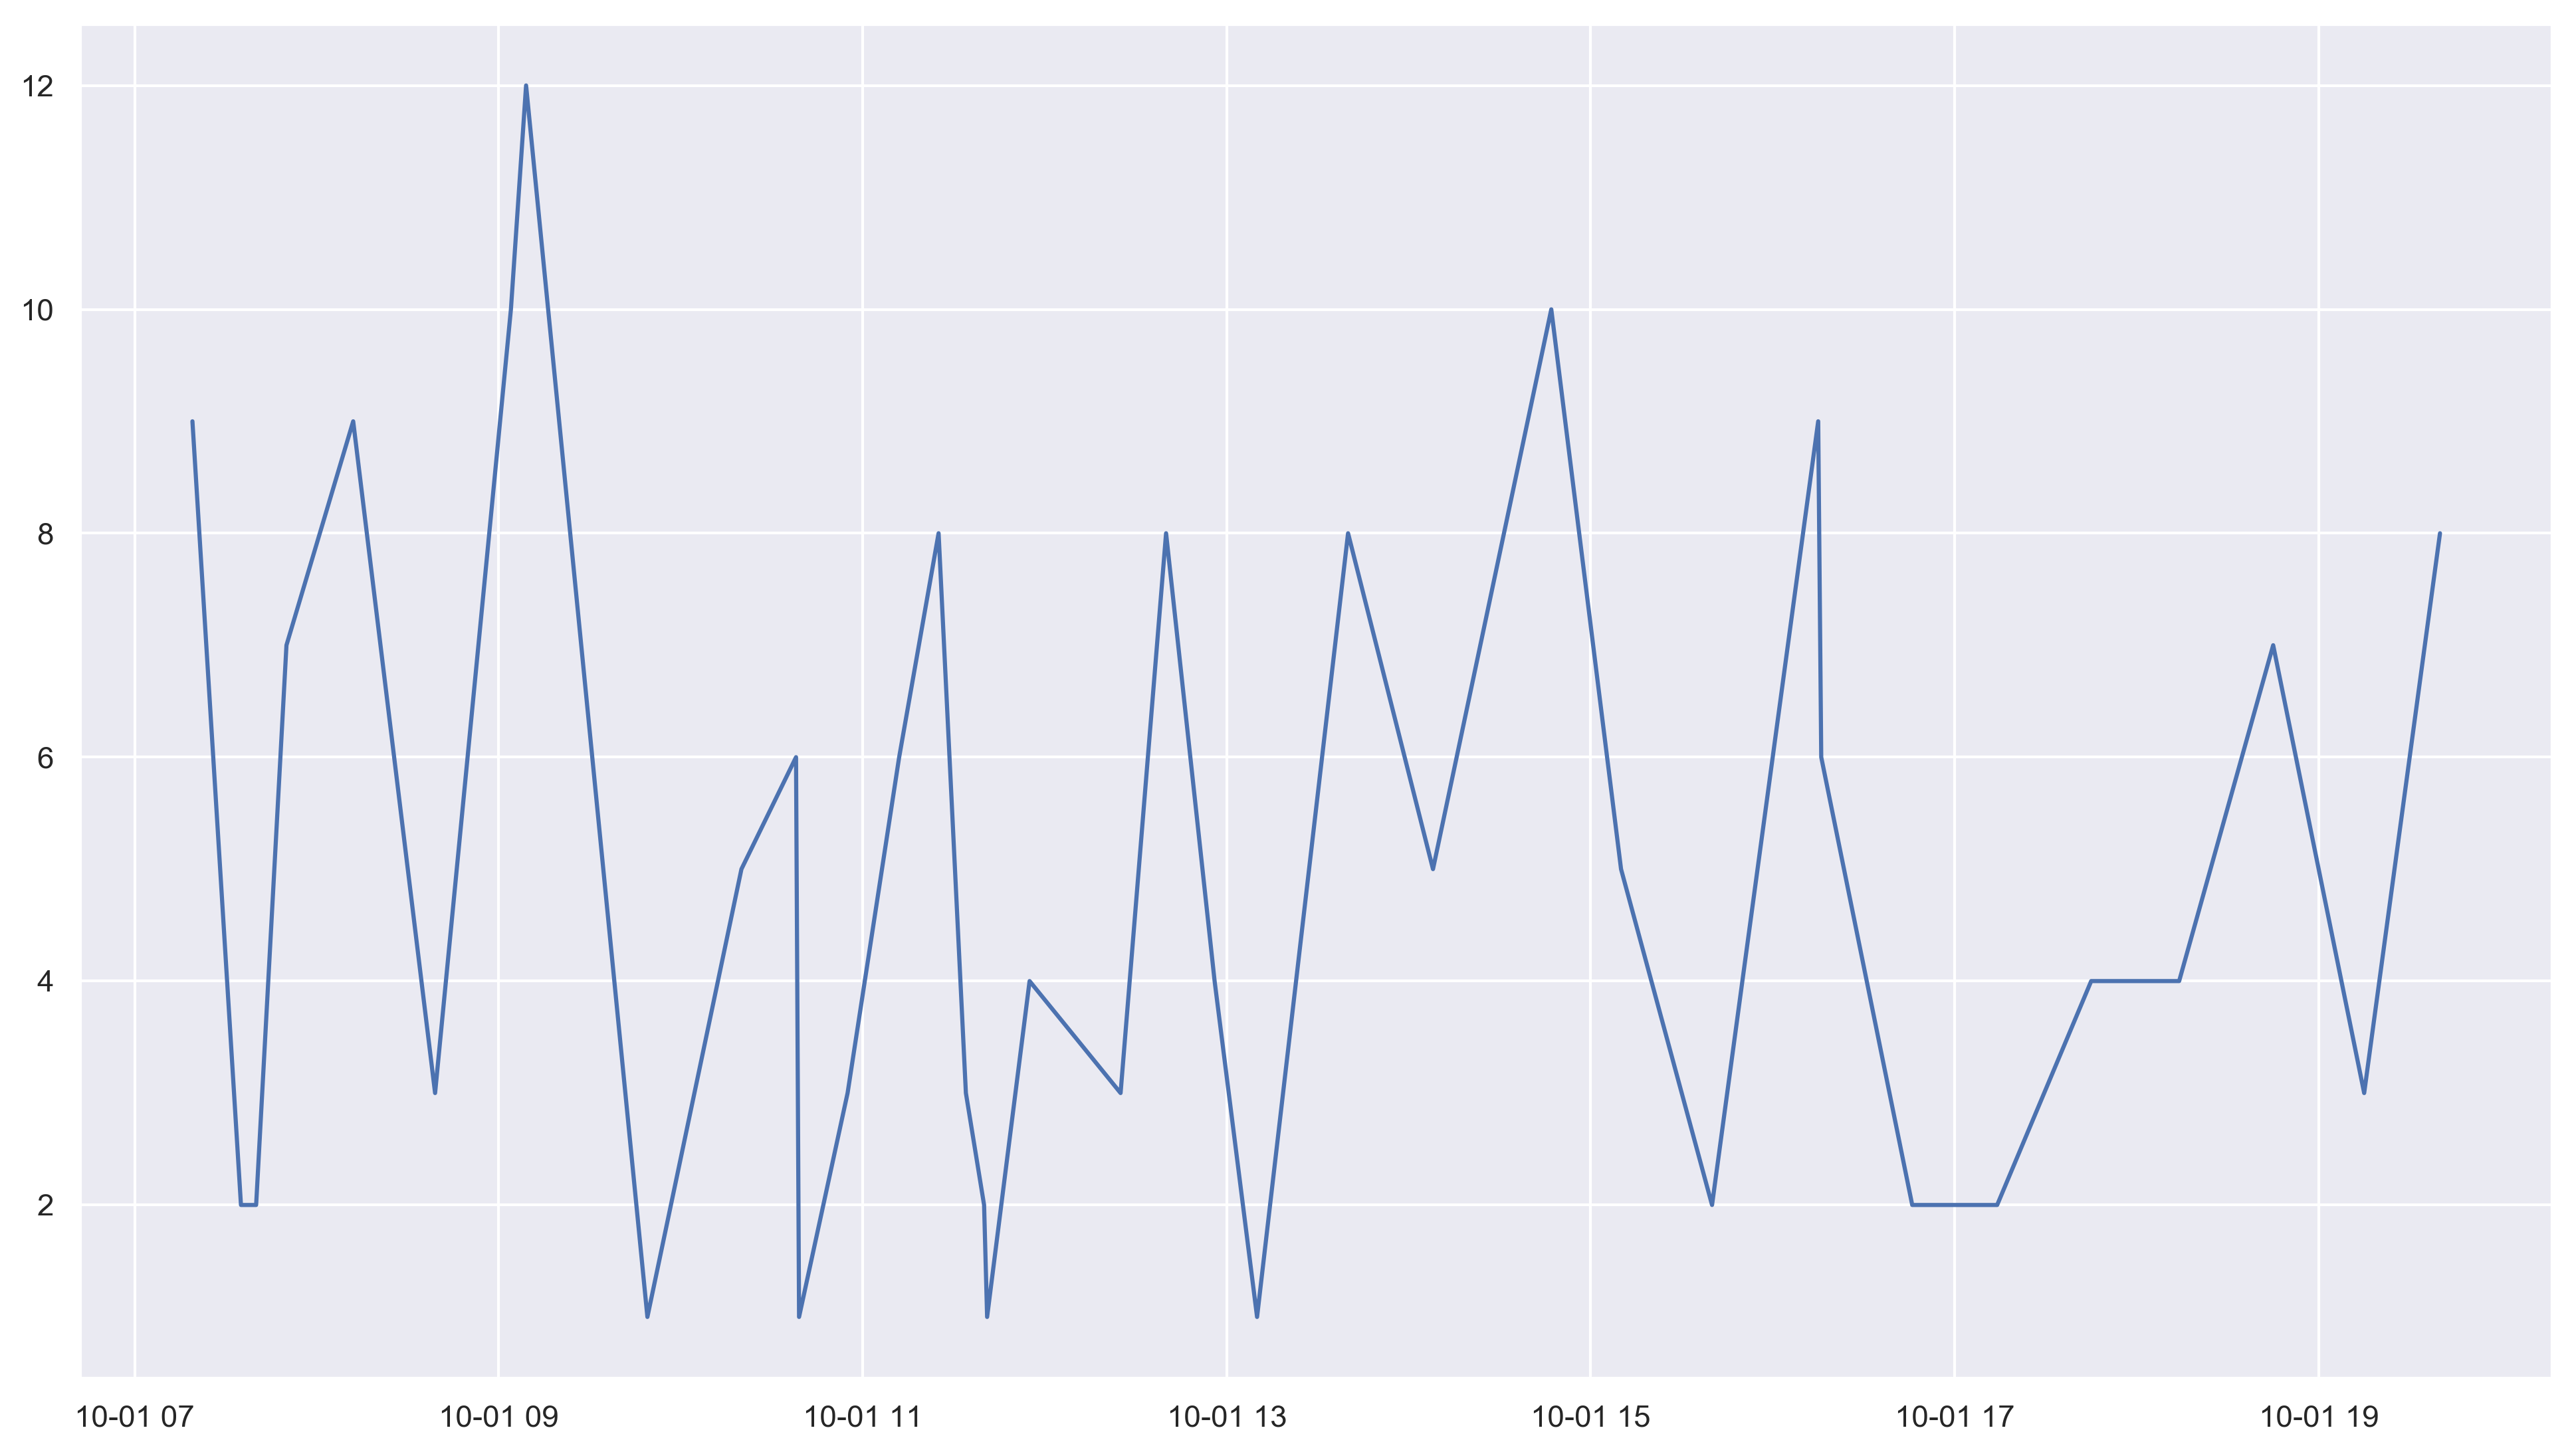

In [43]:
fig = plt.figure(figsize=(16,9), dpi=300)

plt.plot(df2['DateTime'],df2['StopName'])

In [47]:
df_monday = df[df['DateTime'].dt.day_name() == 'Monday']
df_monday.shape

(5257, 4)

In [49]:
df_monday = df_monday.query('StopName == "Main and Murray IB"')
df_monday.shape

(567, 4)

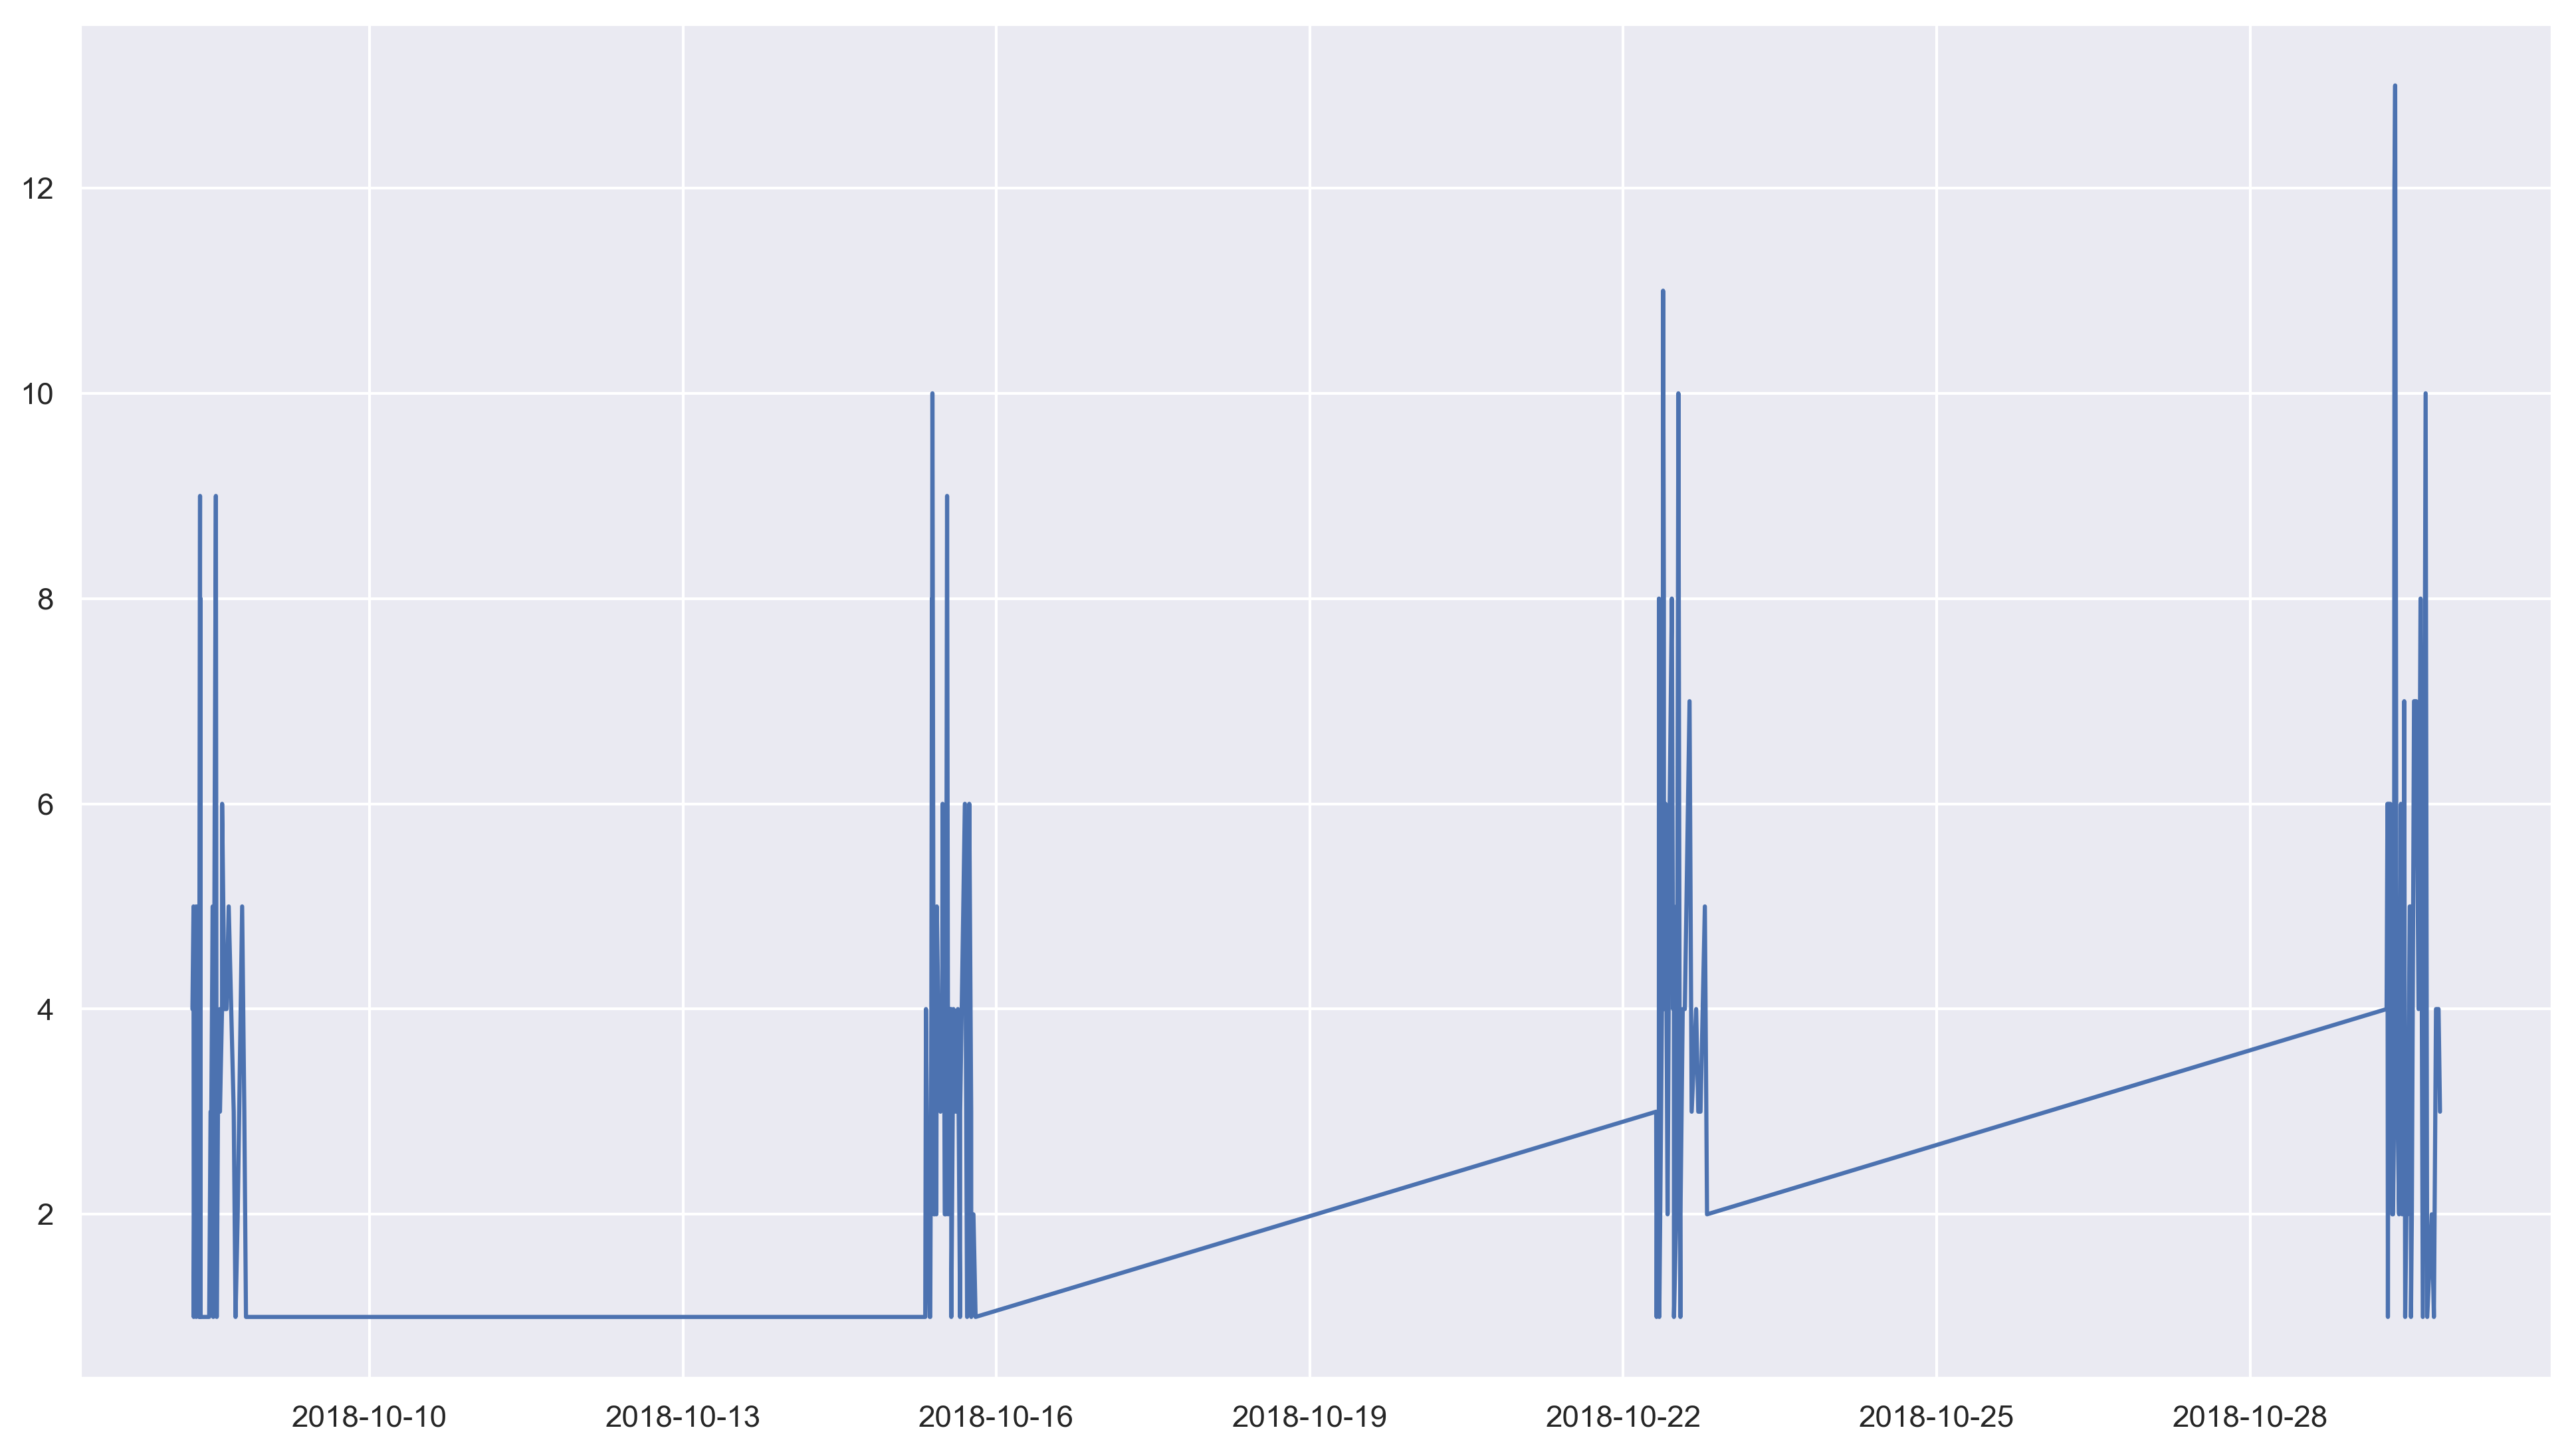

In [57]:
df_temp = df_monday.groupby(['DateTime'], as_index=False).count()

fig = plt.figure(figsize=(16,9), dpi=300)

plt.plot(df_temp['DateTime'],df_temp['StopName'])

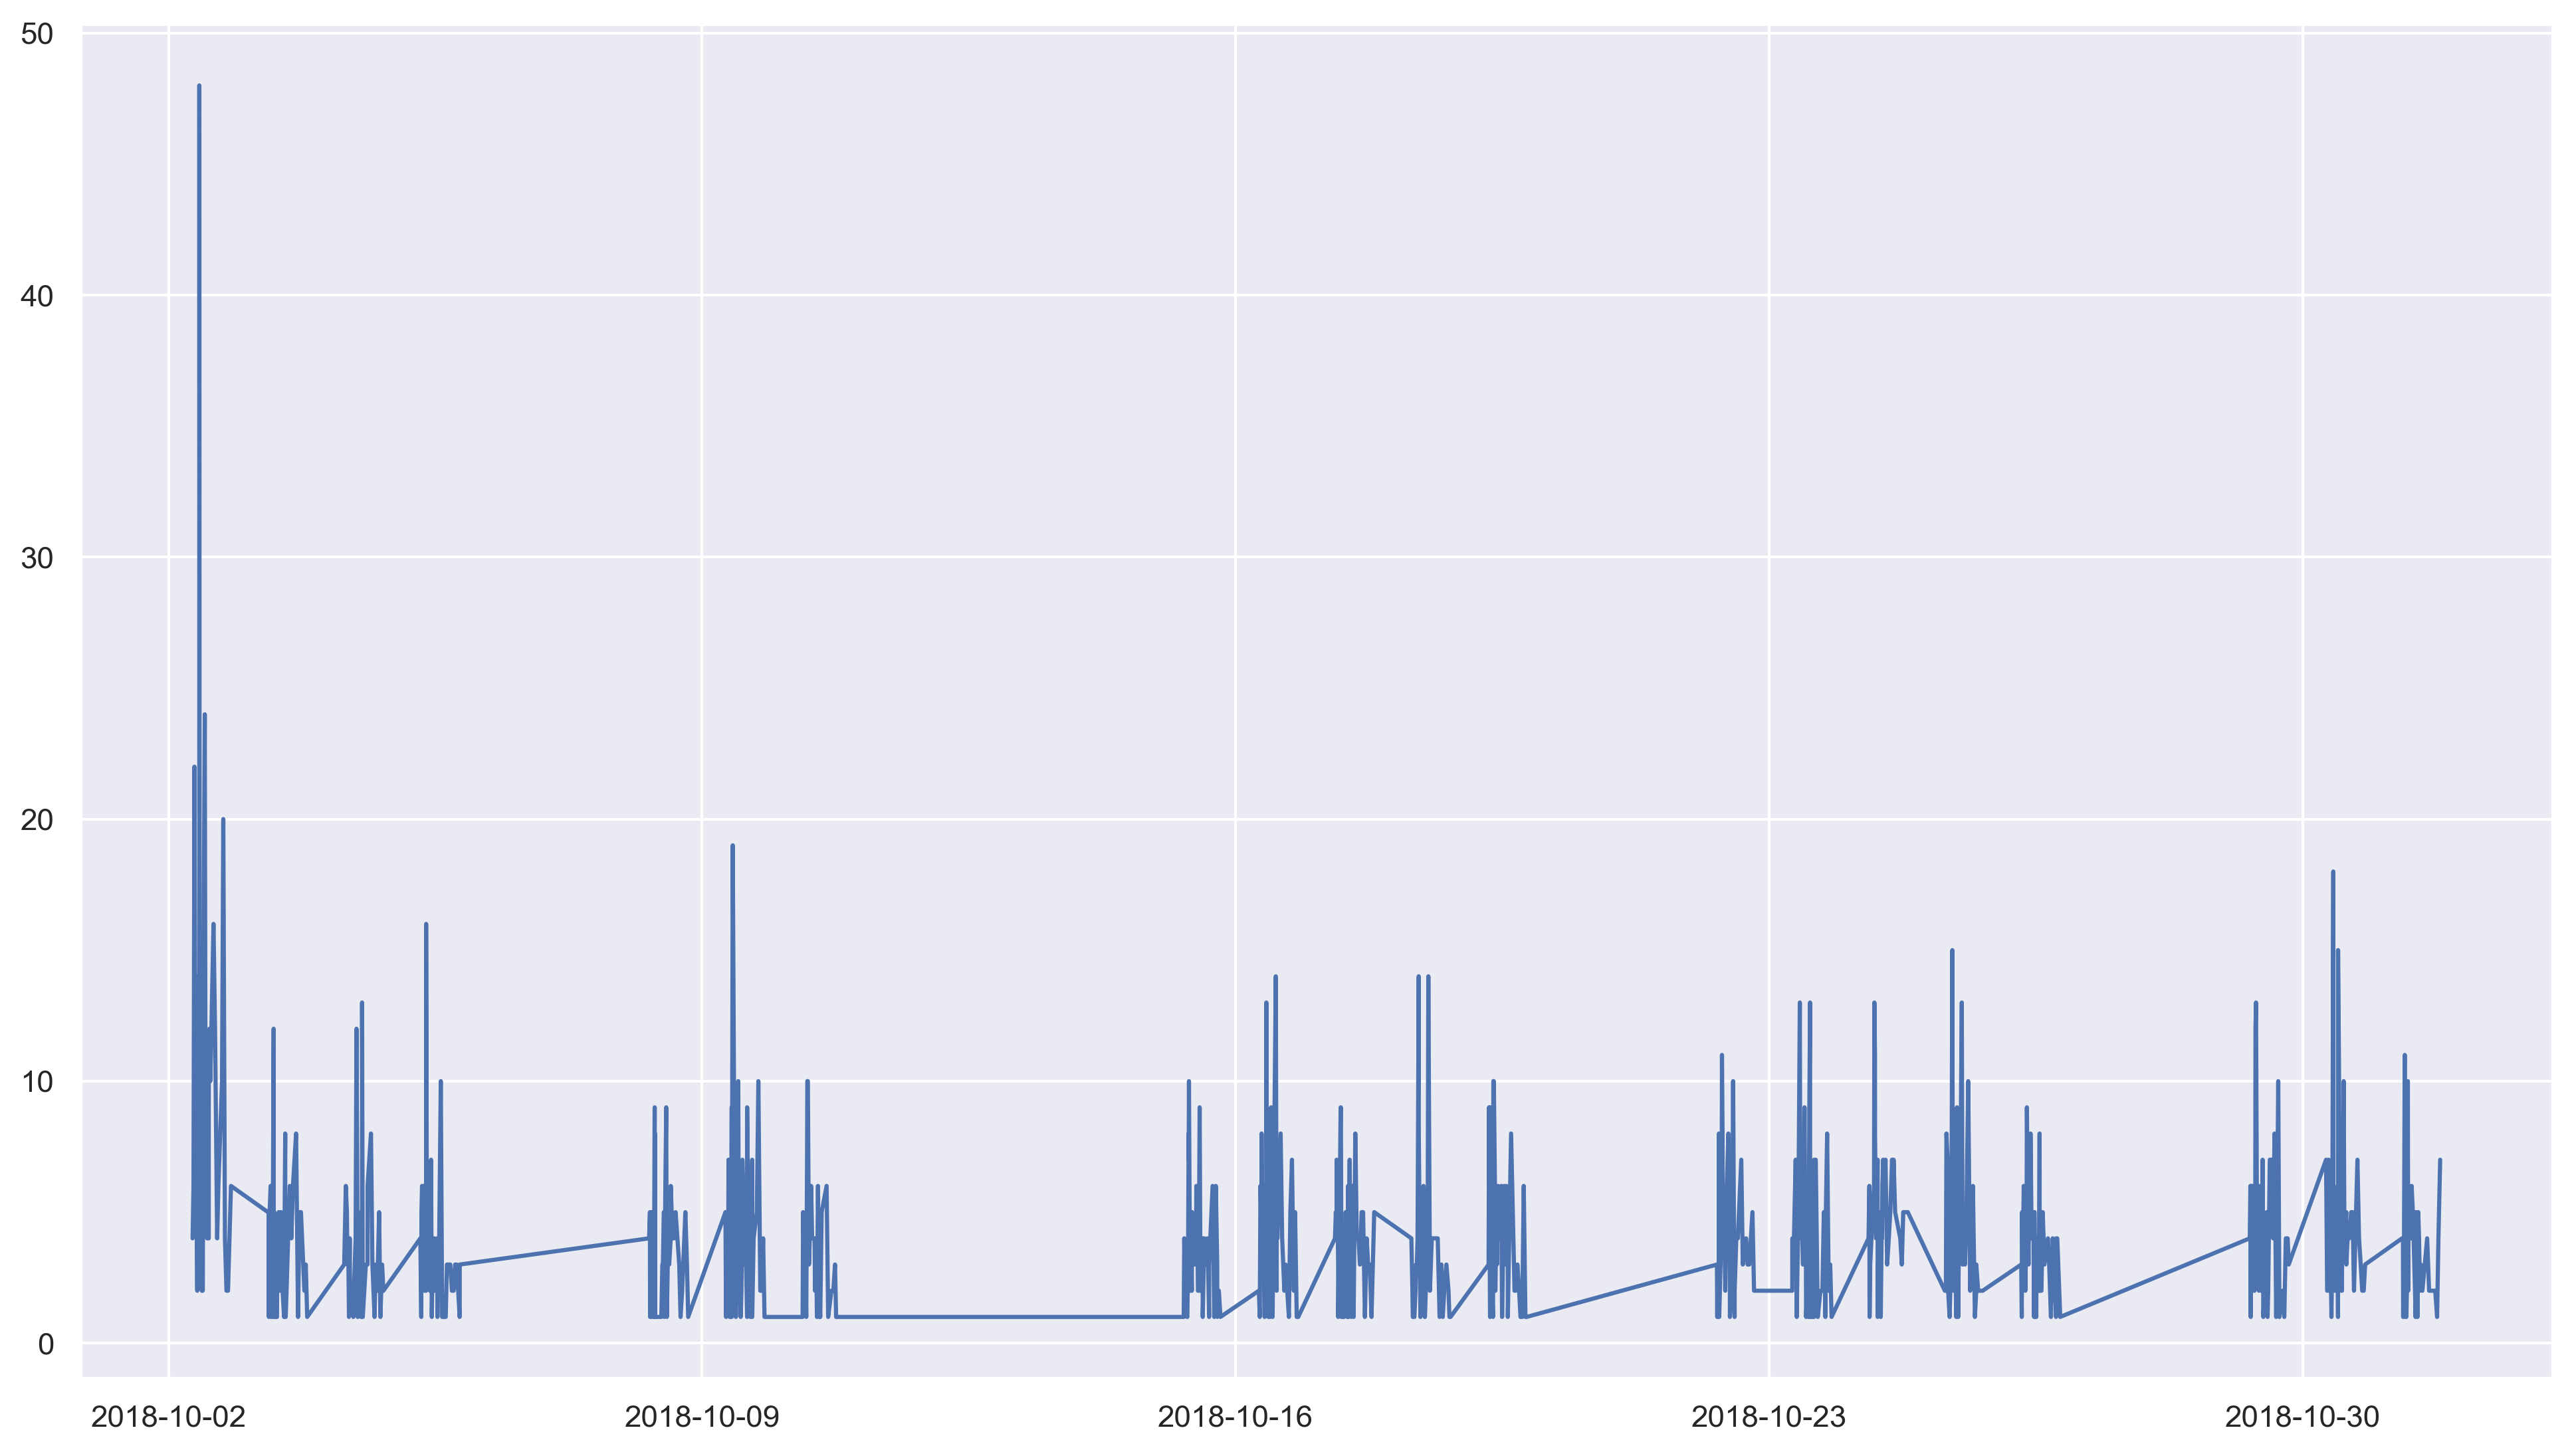

In [59]:
df_temp = df.query('StopName == "Main and Murray IB"')

df_temp = df_temp.groupby(['DateTime'], as_index=False).count()

fig = plt.figure(figsize=(16,9), dpi=300)

plt.plot(df_temp['DateTime'],df_temp['StopName'])
# df_temp.sort_values(by=['StopName'])

Text(0,0.5,'count of people at MAin Murray')

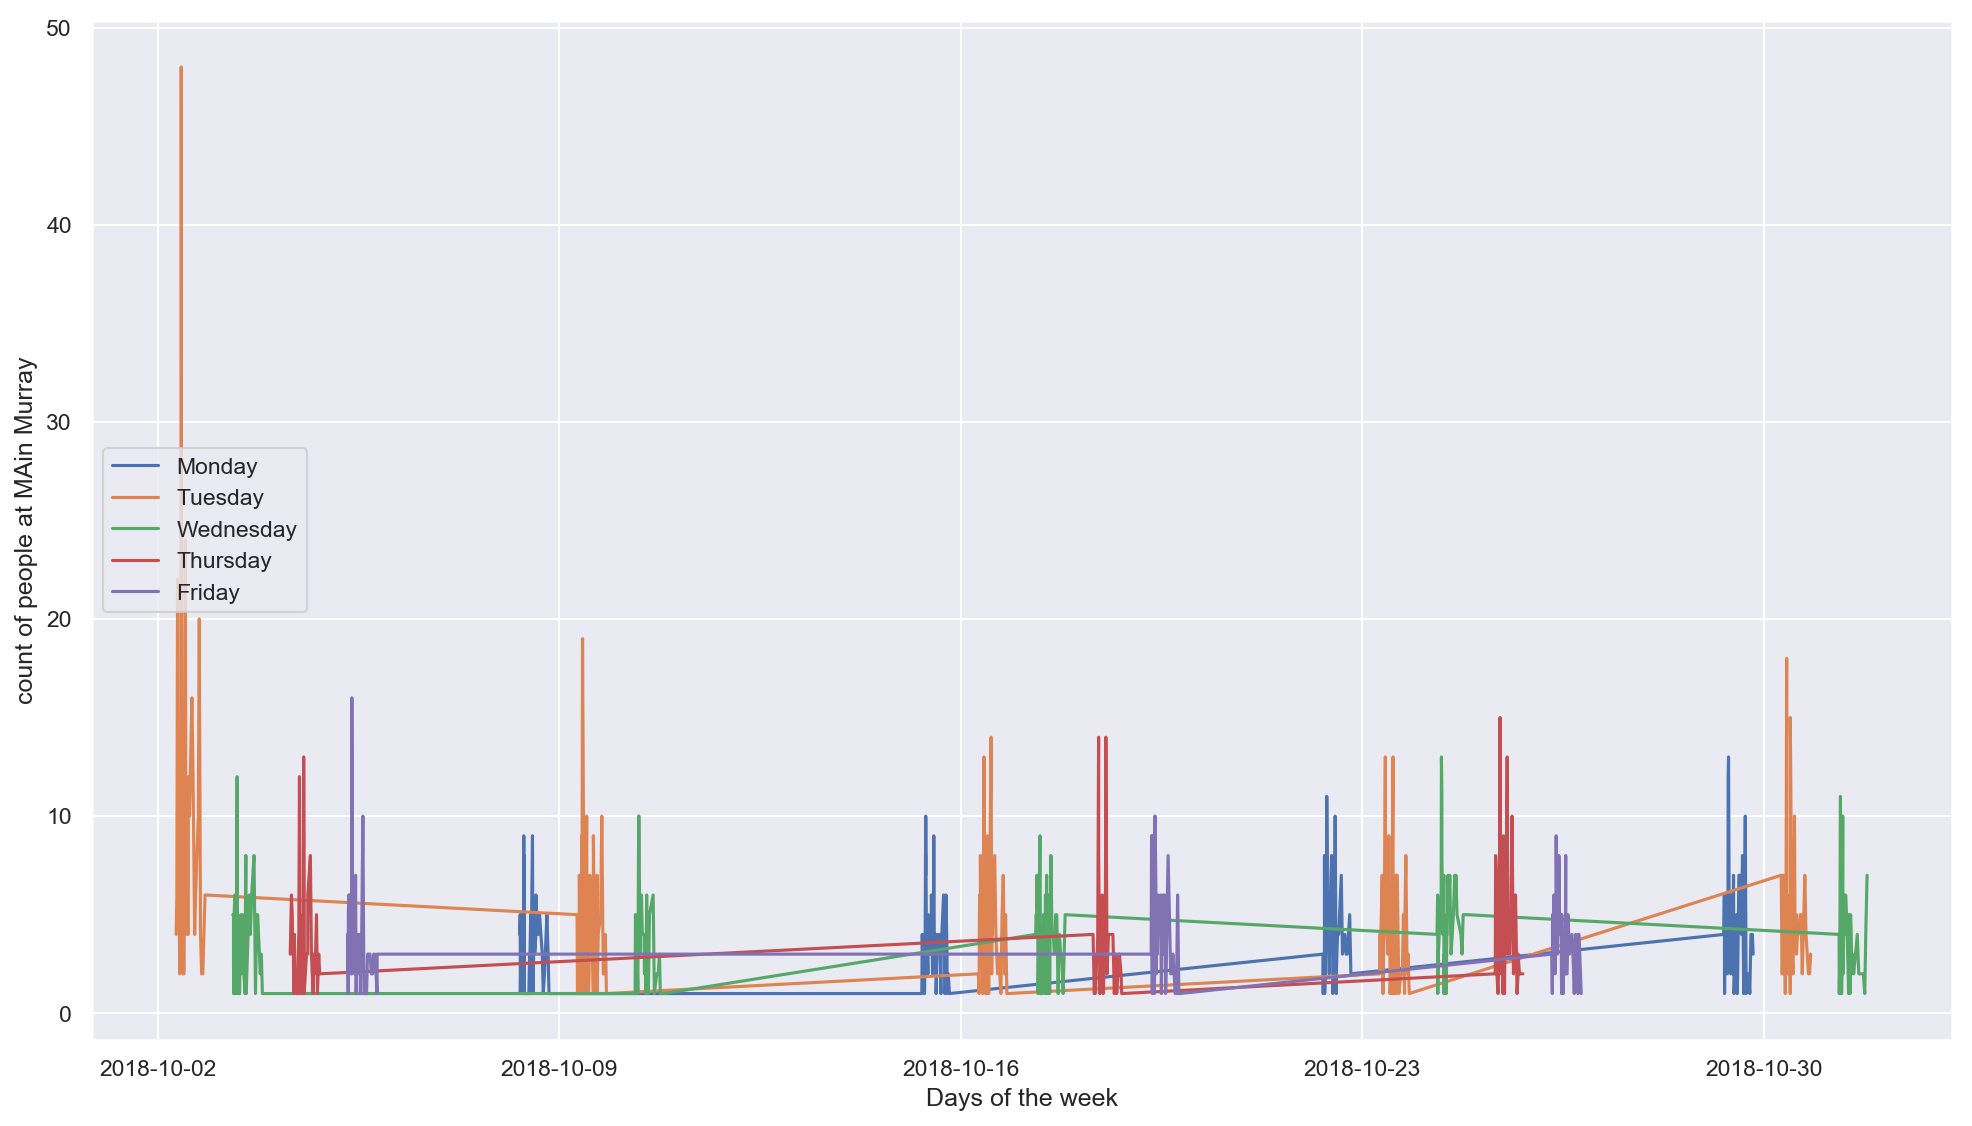

In [78]:
df_temp = df.query('StopName == "Main and Murray IB"')

axes.legend(["label1","label2","label3","label4","Label5"])
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Monday']
df_monday = df_monday.groupby(['DateTime'], as_index=False).count()
axes.plot(df_monday['DateTime'],df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Tuesday']
df_monday = df_monday.groupby(['DateTime'], as_index=False).count()
axes.plot(df_monday['DateTime'],df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Wednesday']
df_monday = df_monday.groupby(['DateTime'], as_index=False).count()
axes.plot(df_monday['DateTime'],df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Thursday']
df_monday = df_monday.groupby(['DateTime'], as_index=False).count()
axes.plot(df_monday['DateTime'],df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Friday']
df_monday = df_monday.groupby(['DateTime'], as_index=False).count()
axes.plot(df_monday['DateTime'],df_monday['StopName'])

axes.legend(["Monday","Tuesday","Wednesday","Thursday","Friday"], loc=6)
axes.set_xlabel("Days of the week")
axes.set_ylabel("count of people at MAin Murray")


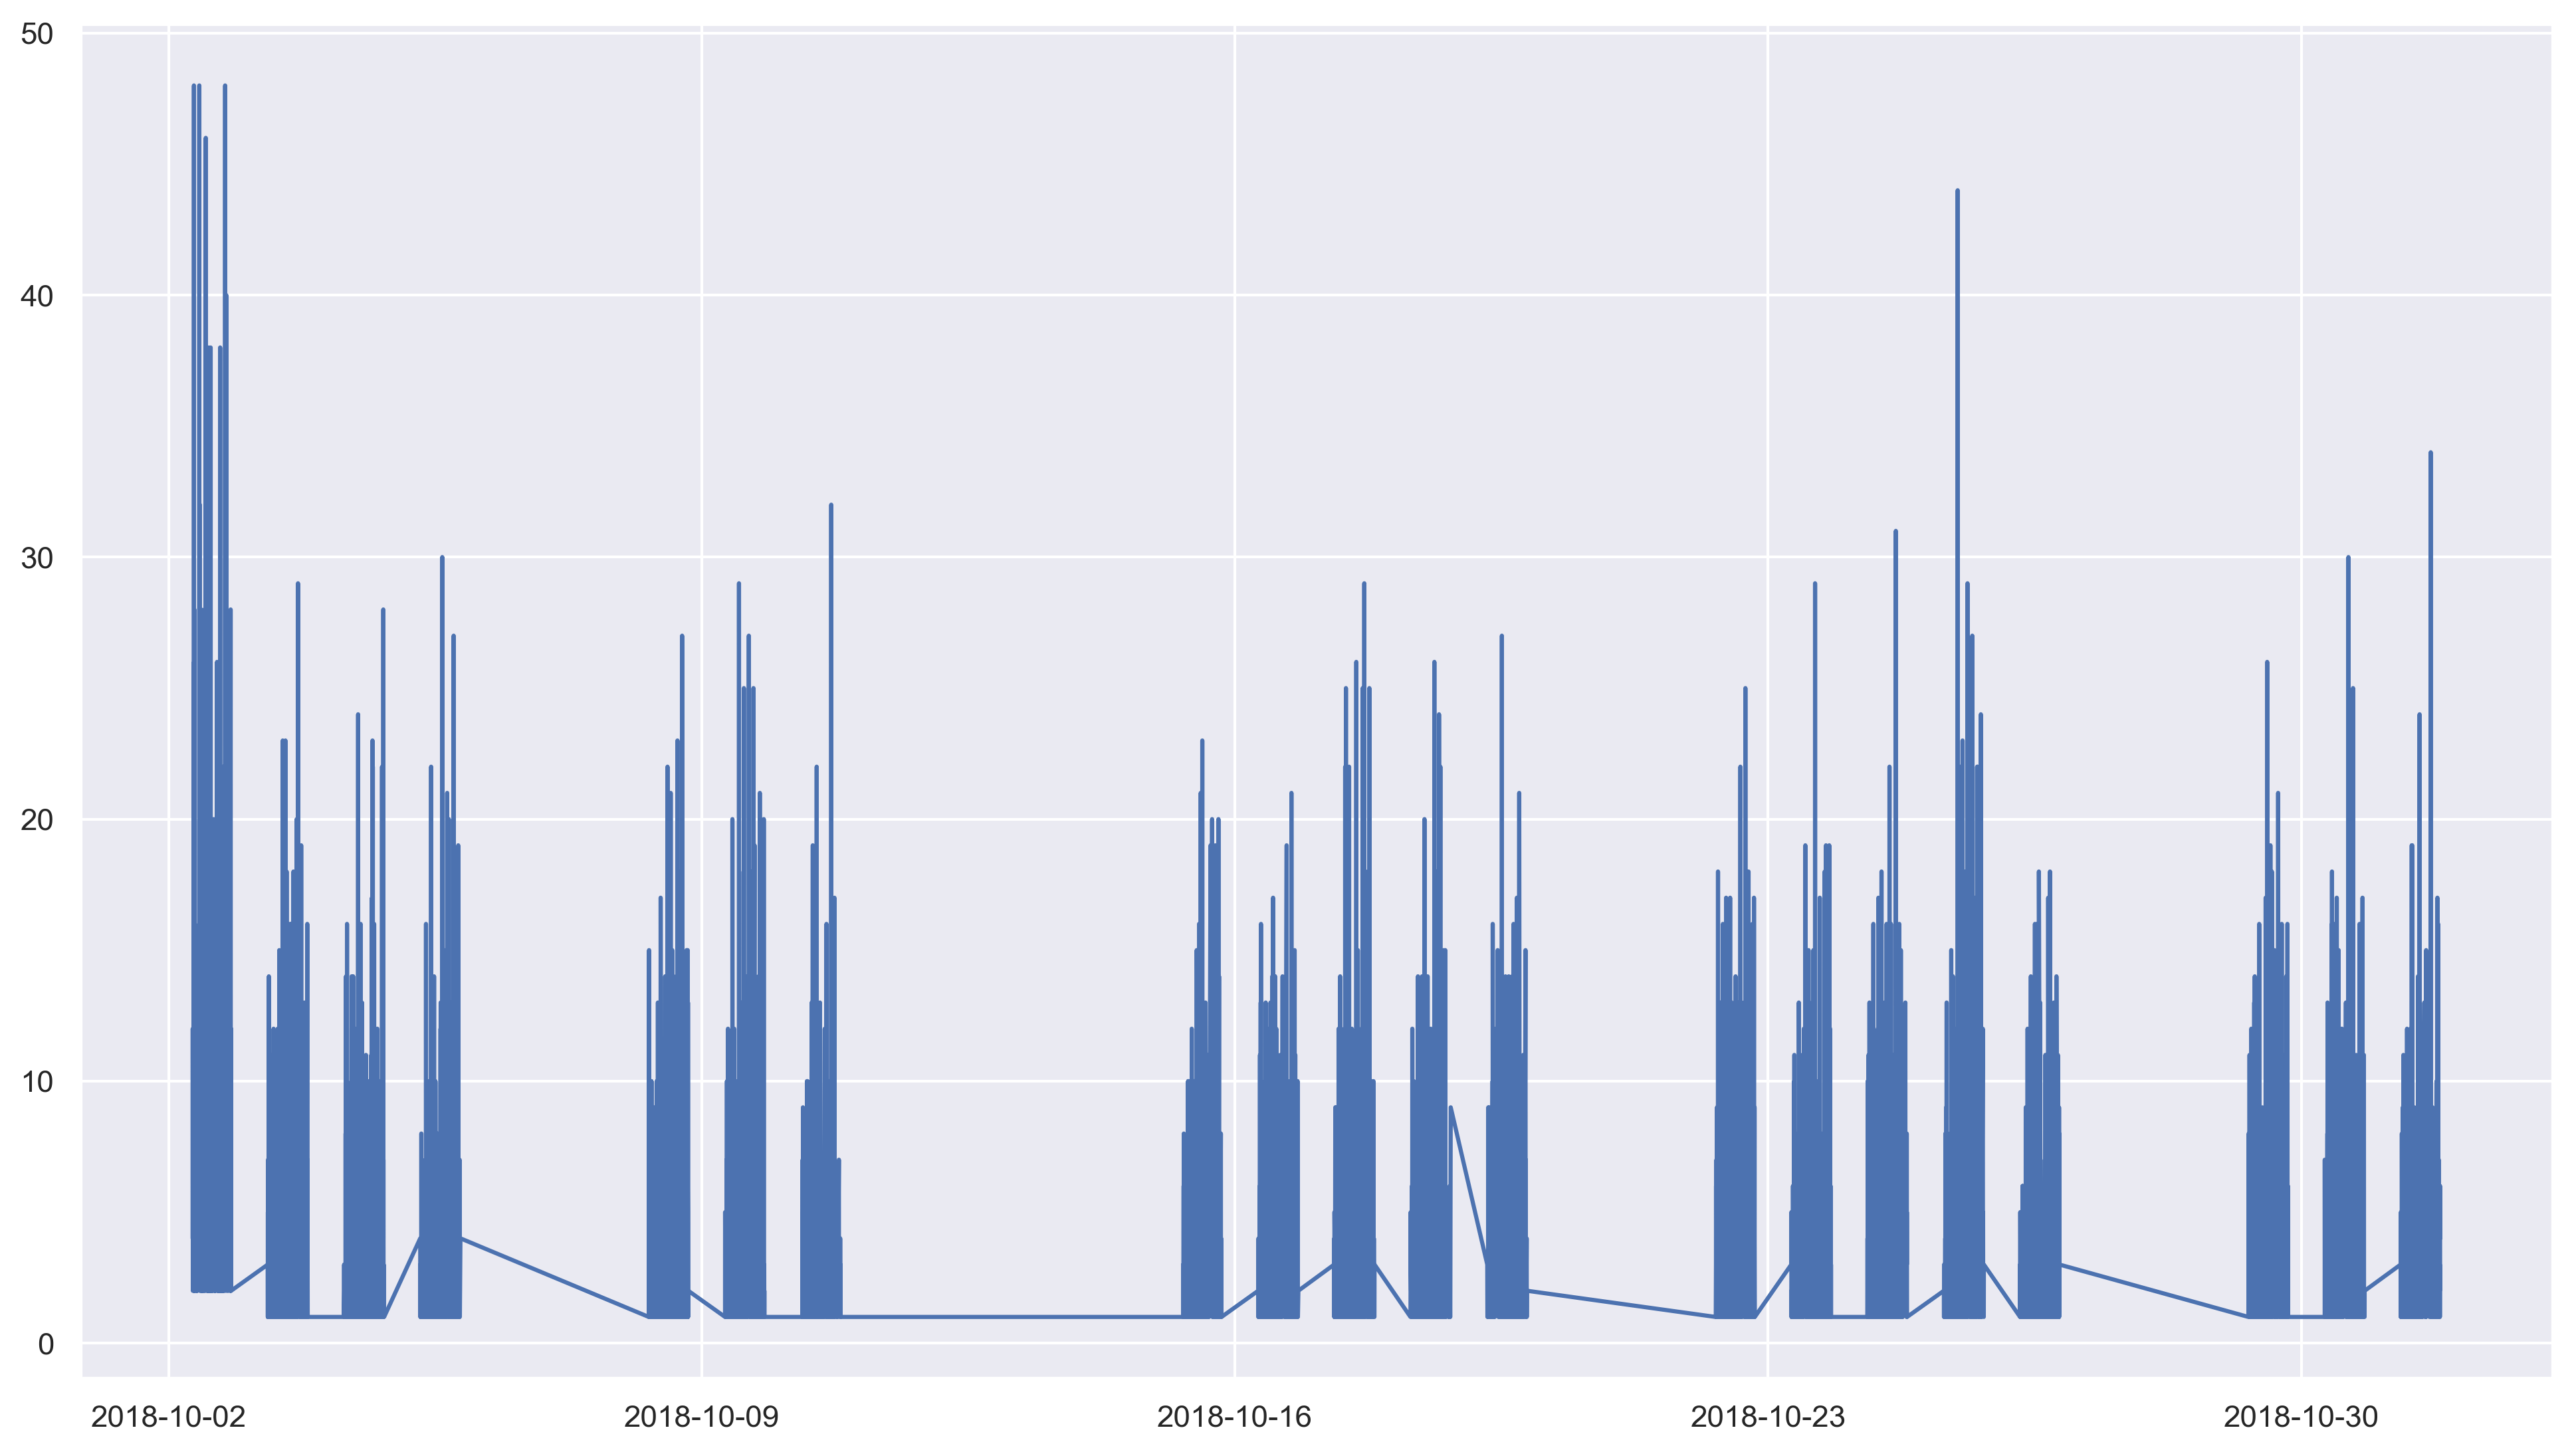

In [79]:
df_temp = df.groupby(['DateTime'], as_index=False).count()

fig = plt.figure(figsize=(16,9), dpi=300)
plt.plot(df_temp['DateTime'],df_temp['StopName'])

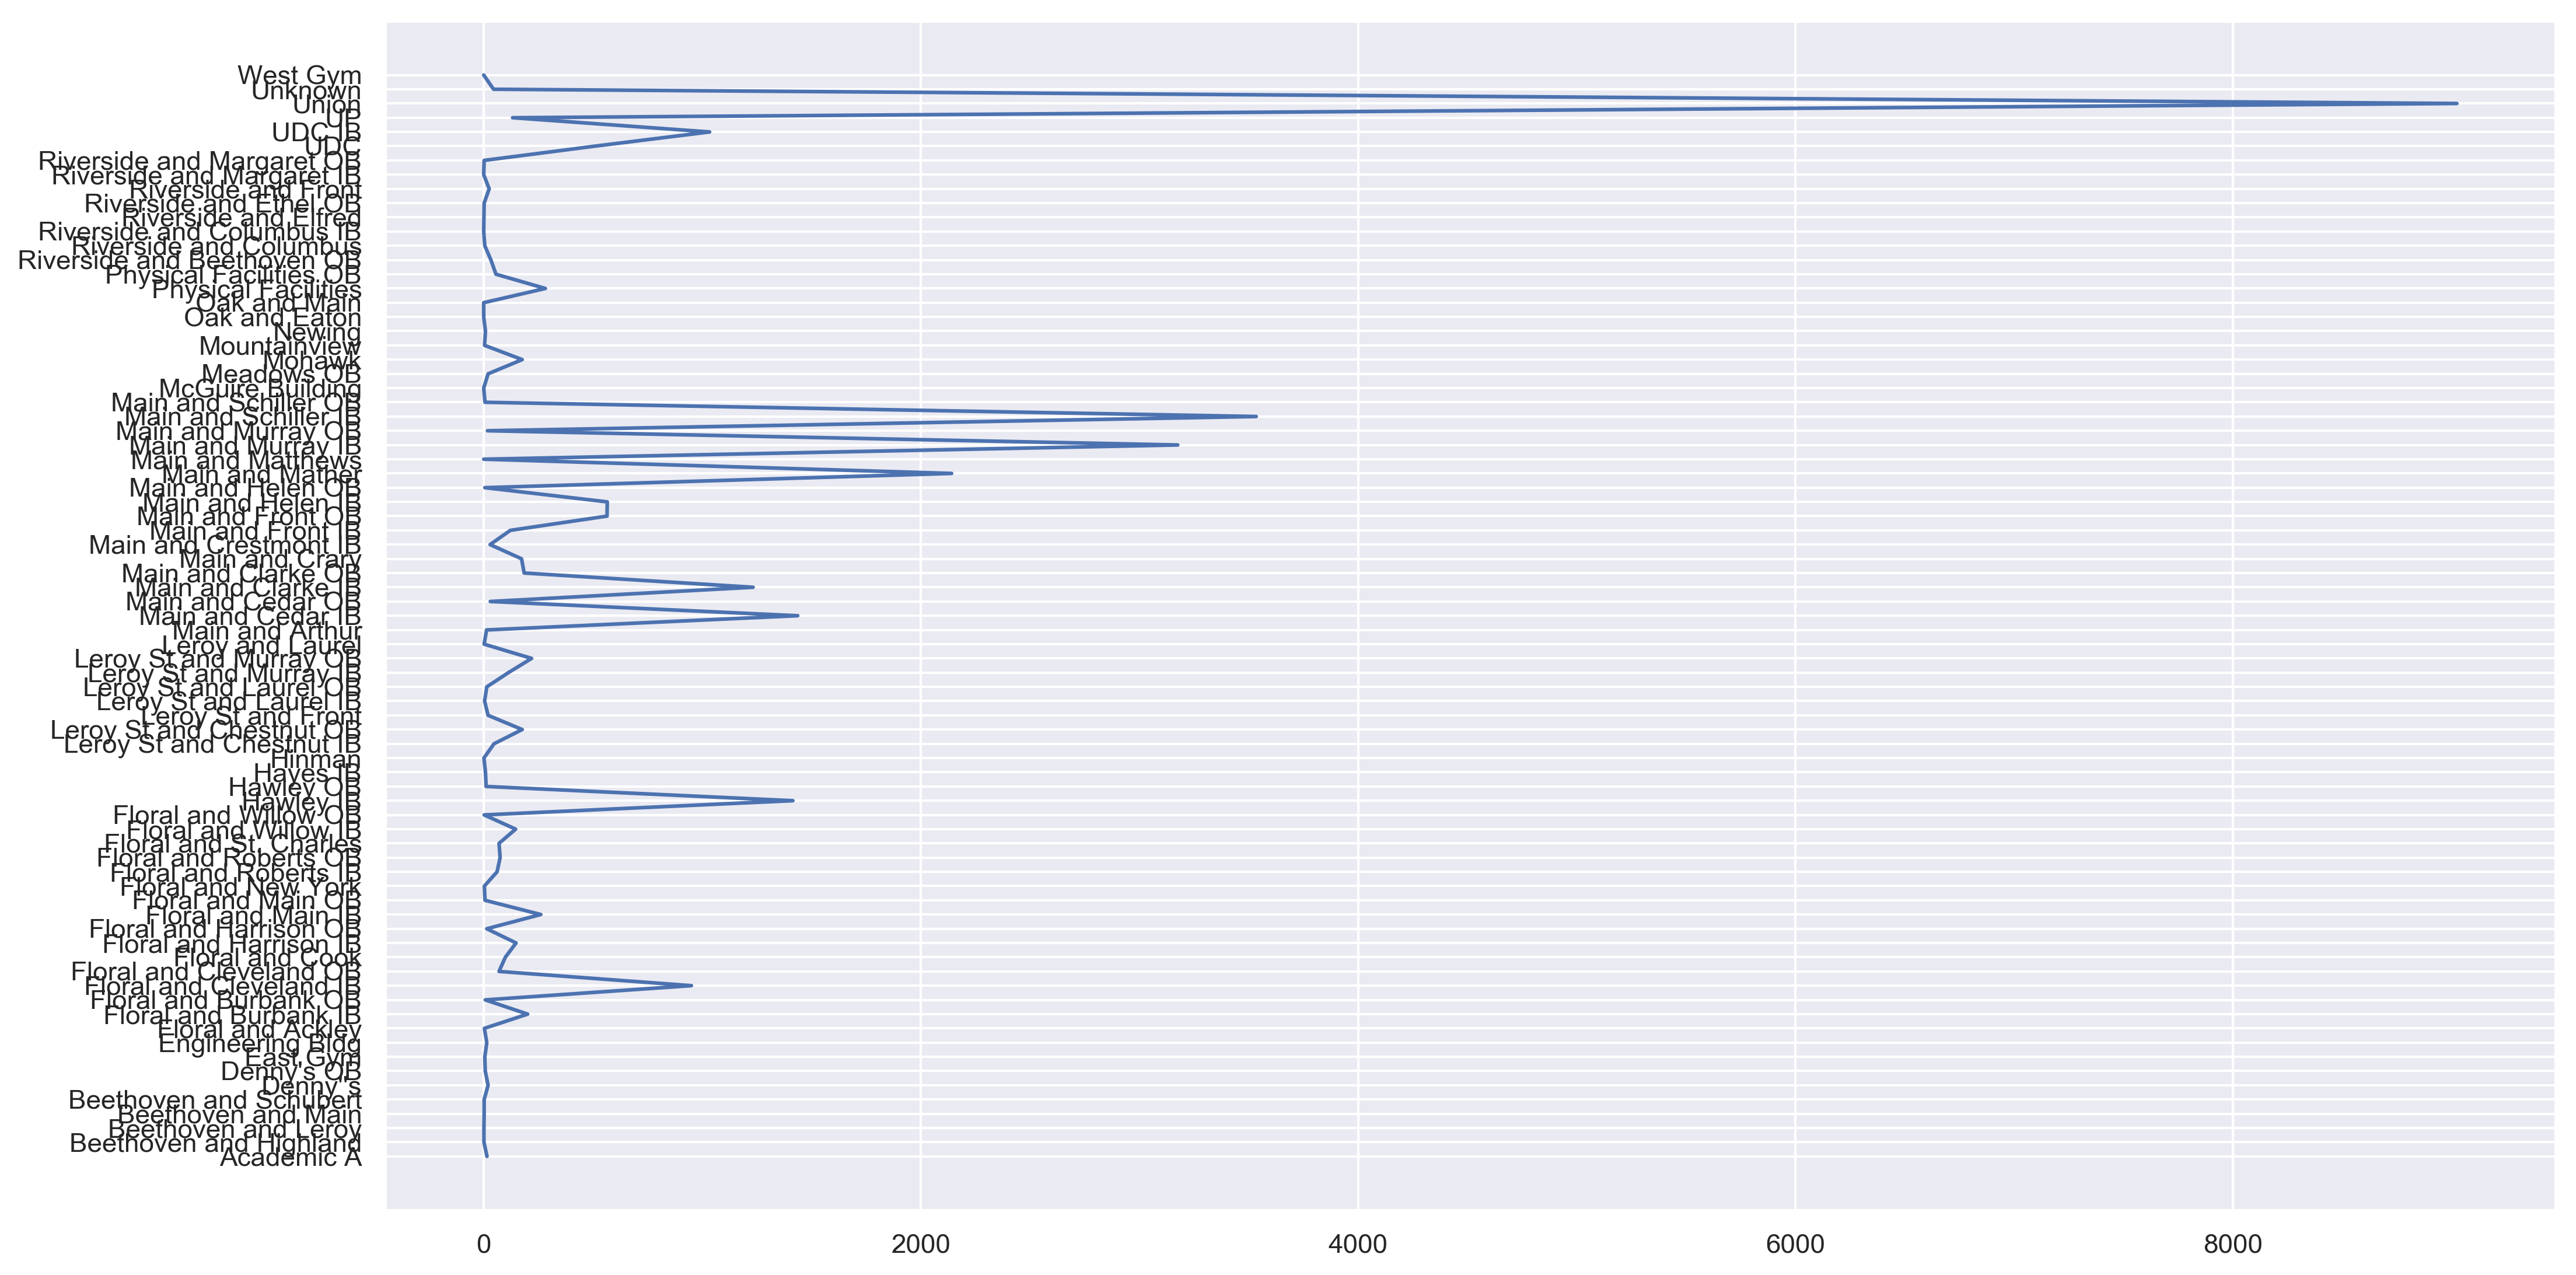

In [80]:
df_temp = df.groupby(['StopName'], as_index=False).count()

fig = plt.figure(figsize=(16,9), dpi=300)
plt.plot(df_temp['DateTime'],df_temp['StopName'])

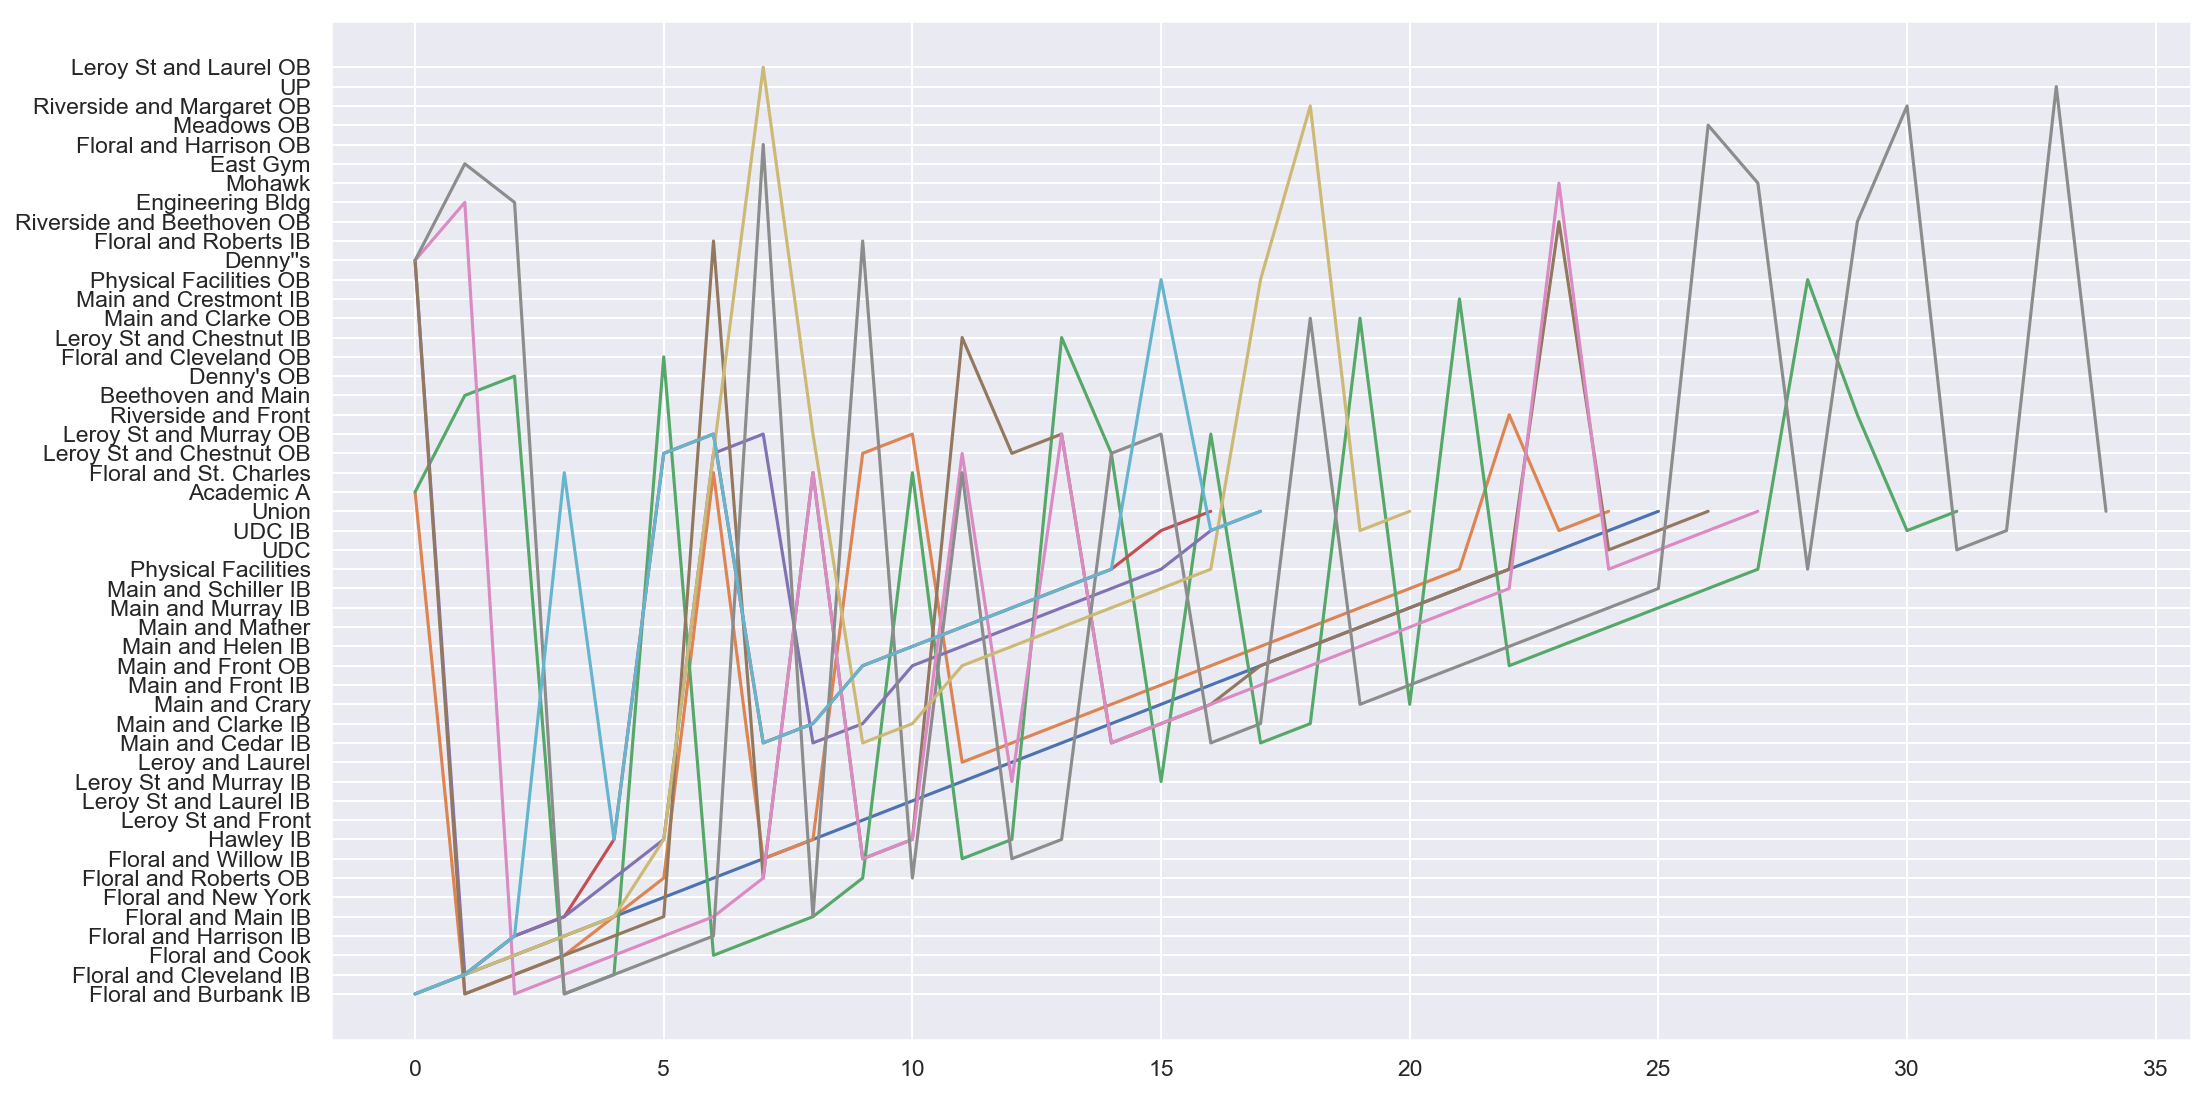

In [127]:
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df.set_index('DateTime')

df_temp1 = df_temp['2018-10-02 07':'2018-10-02 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 09':'2018-10-02 11']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 11':'2018-10-02 15']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 15':'2018-10-02 17']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 17':'2018-10-02 20']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

# next day
df_temp1 = df_temp['2018-10-03 07':'2018-10-03 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-03 09':'2018-10-03 11']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-03 11':'2018-10-03 15']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-03 15':'2018-10-03 17']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-0 17':'2018-10-03 20']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

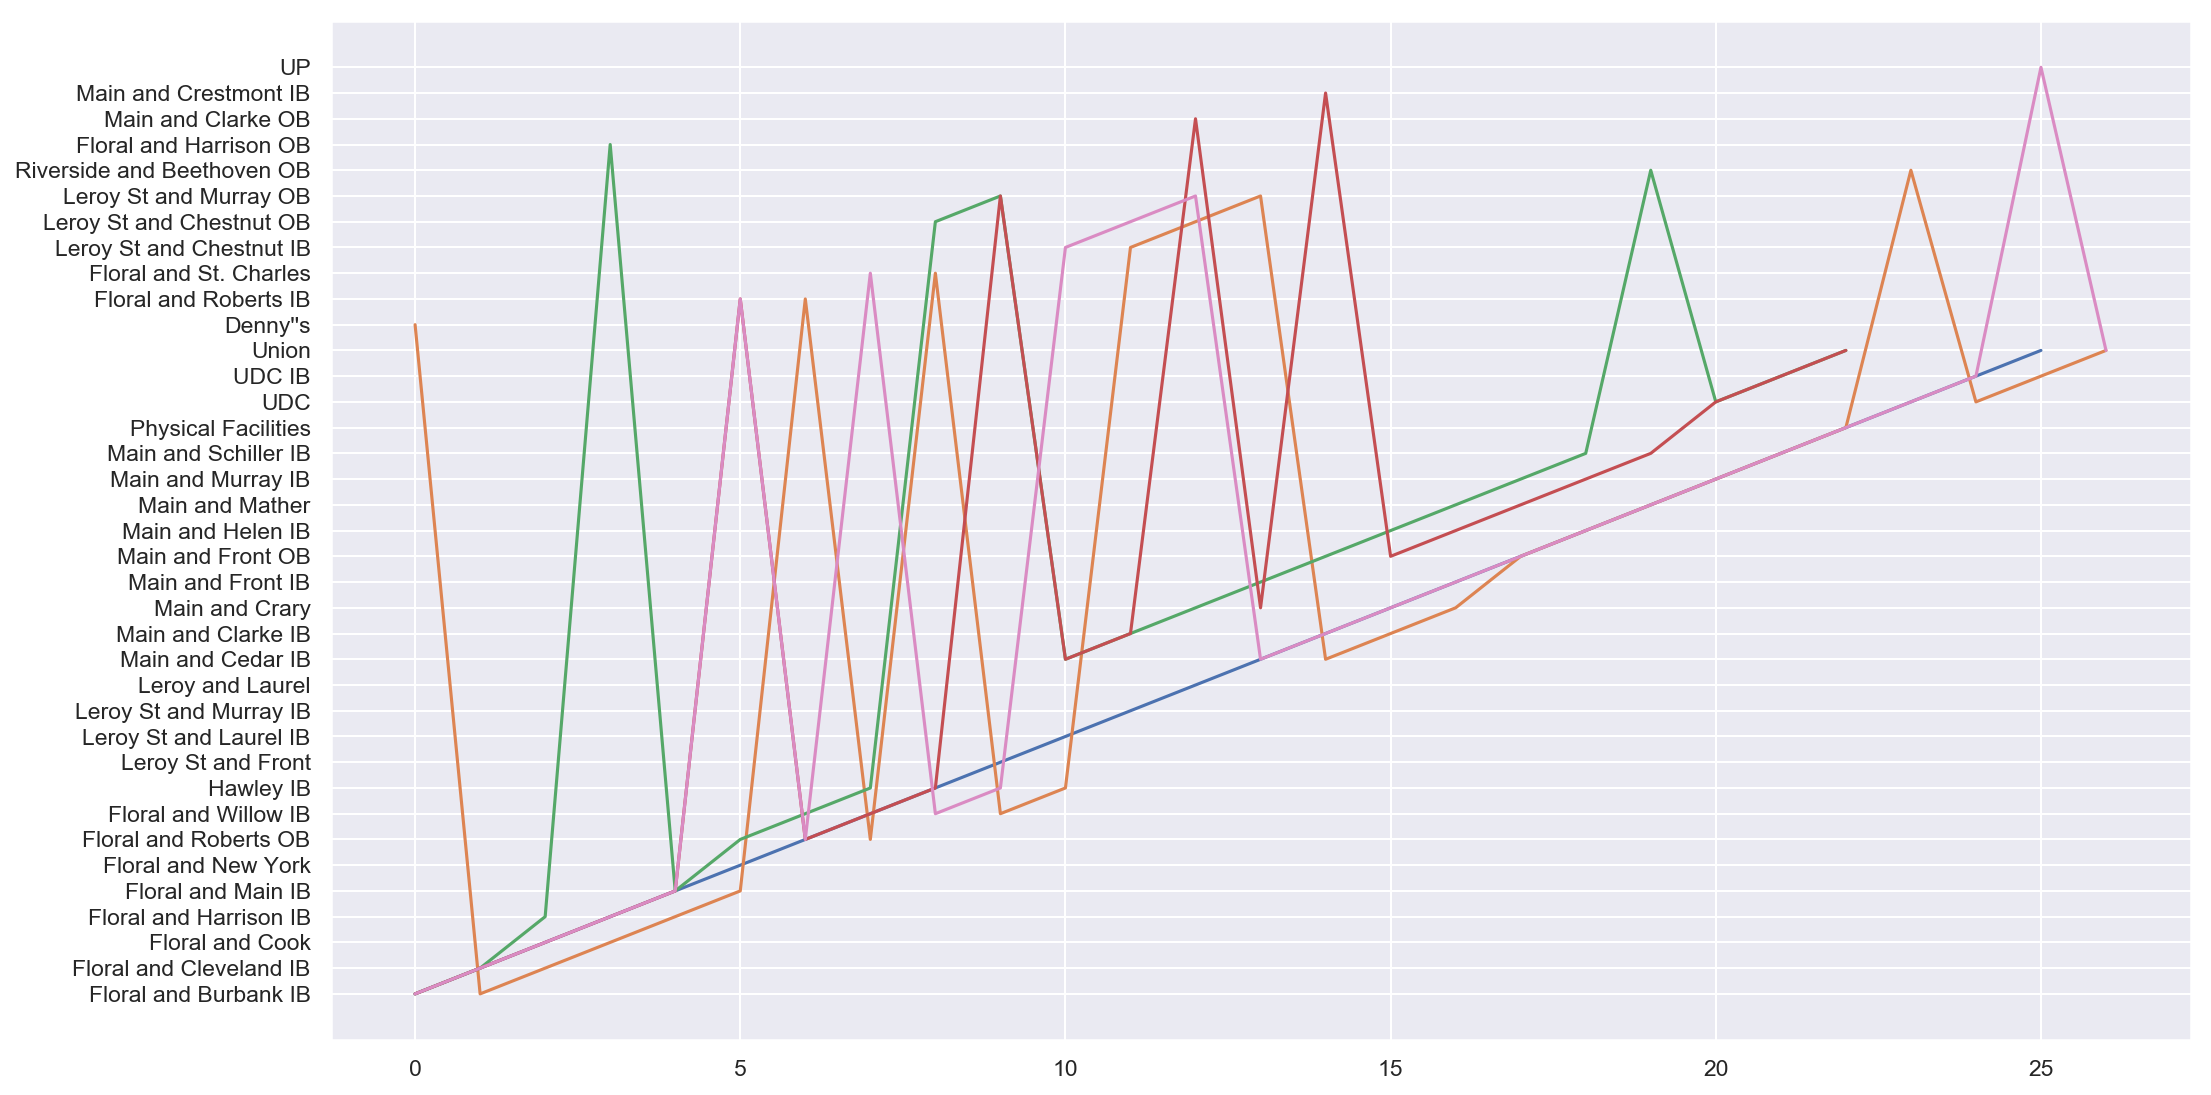

In [129]:
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df.set_index('DateTime')

df_temp1 = df_temp['2018-10-02 07':'2018-10-02 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-03 07':'2018-10-03 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-04 07':'2018-10-04 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-05 07':'2018-10-05 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-06 07':'2018-10-06 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-07 07':'2018-10-07 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-08 07':'2018-10-08 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.plot(df_temp1.index, df_temp1['StopName'])

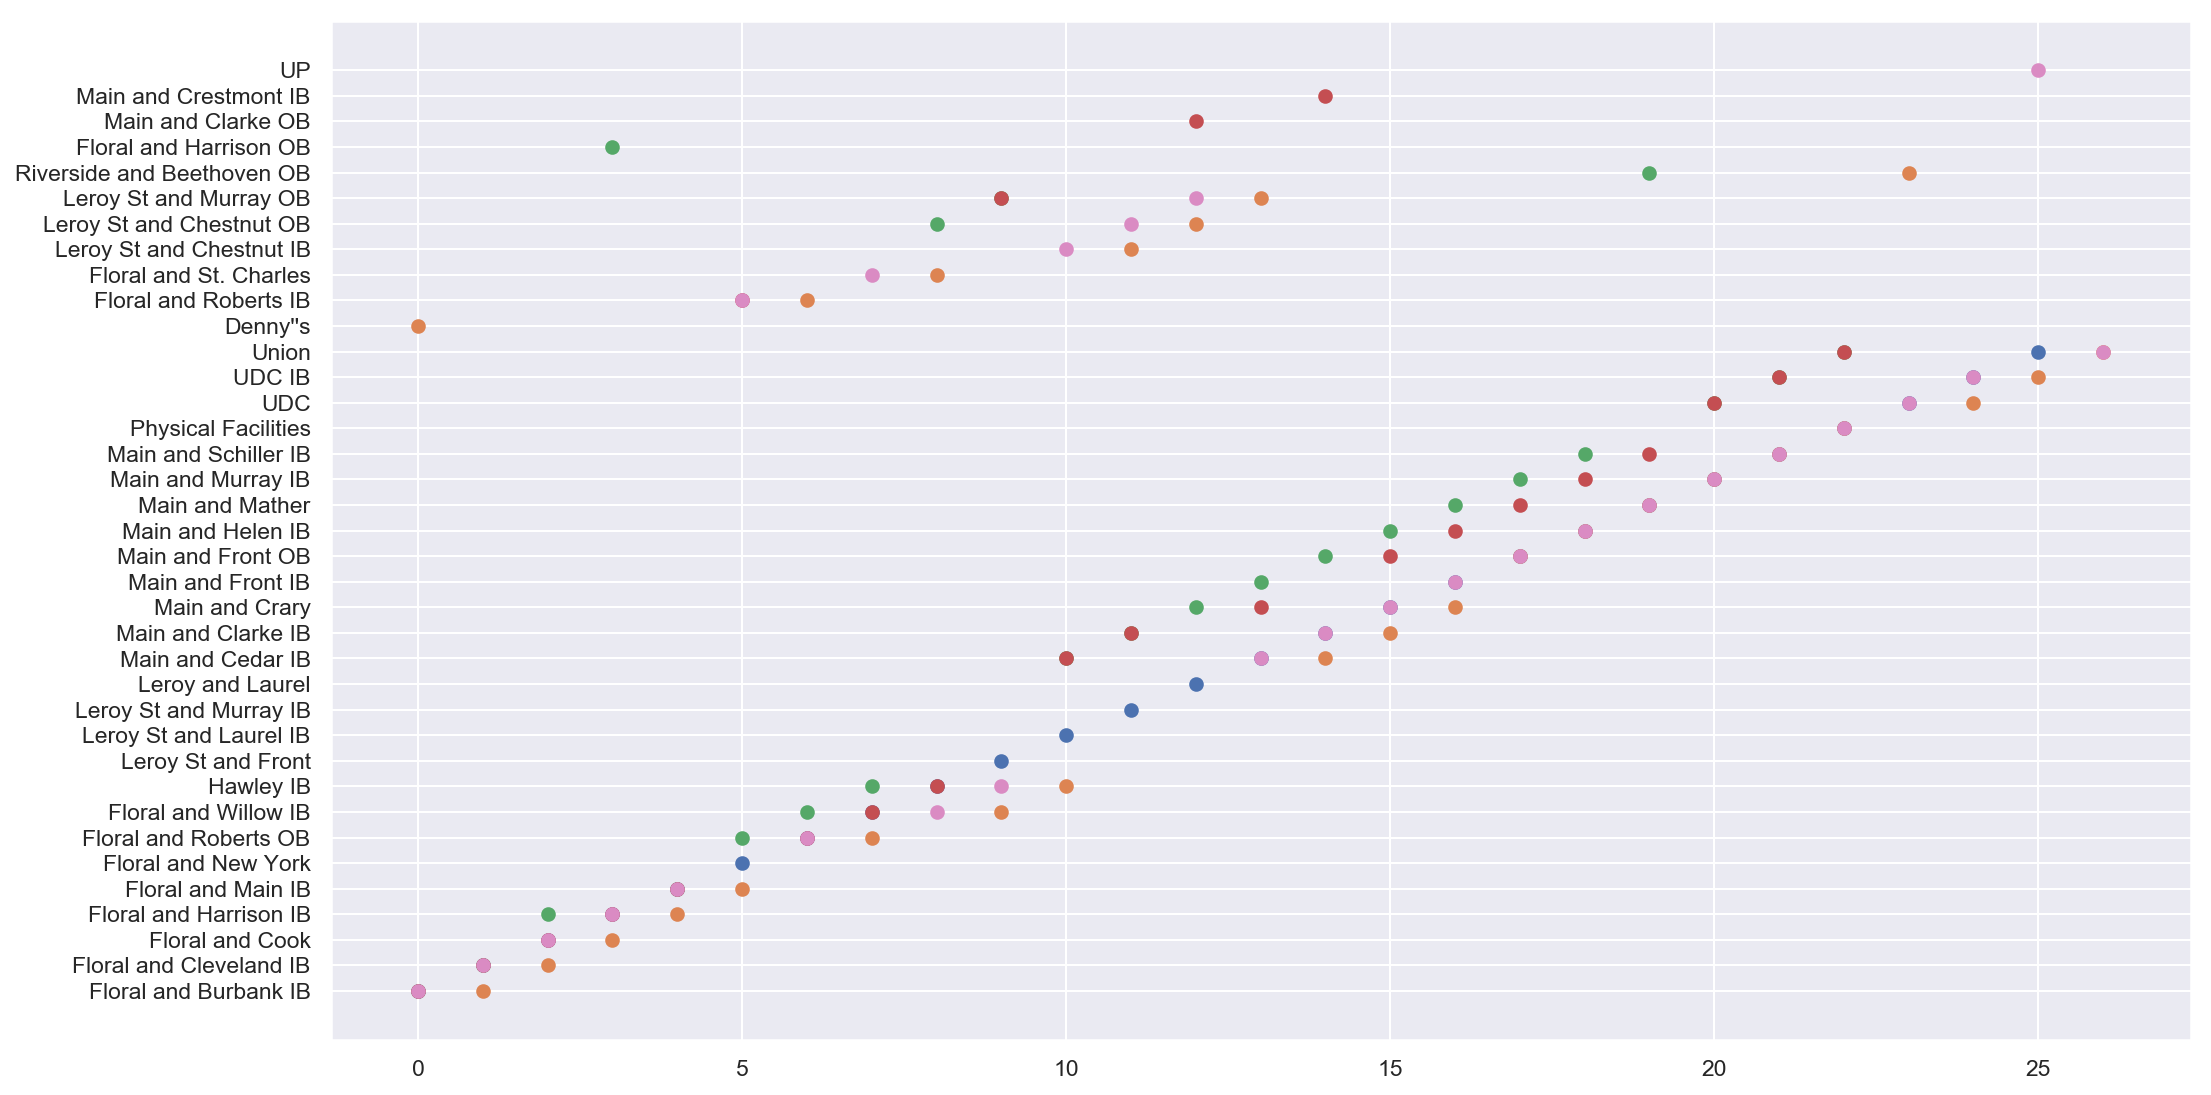

In [131]:
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df.set_index('DateTime')

df_temp1 = df_temp['2018-10-02 07':'2018-10-02 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-03 07':'2018-10-03 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-04 07':'2018-10-04 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-05 07':'2018-10-05 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-06 07':'2018-10-06 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-07 07':'2018-10-07 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

df_temp1 = df_temp['2018-10-08 07':'2018-10-08 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
axes.scatter(df_temp1.index, df_temp1['StopName'])

C:\Users\Dhyanesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


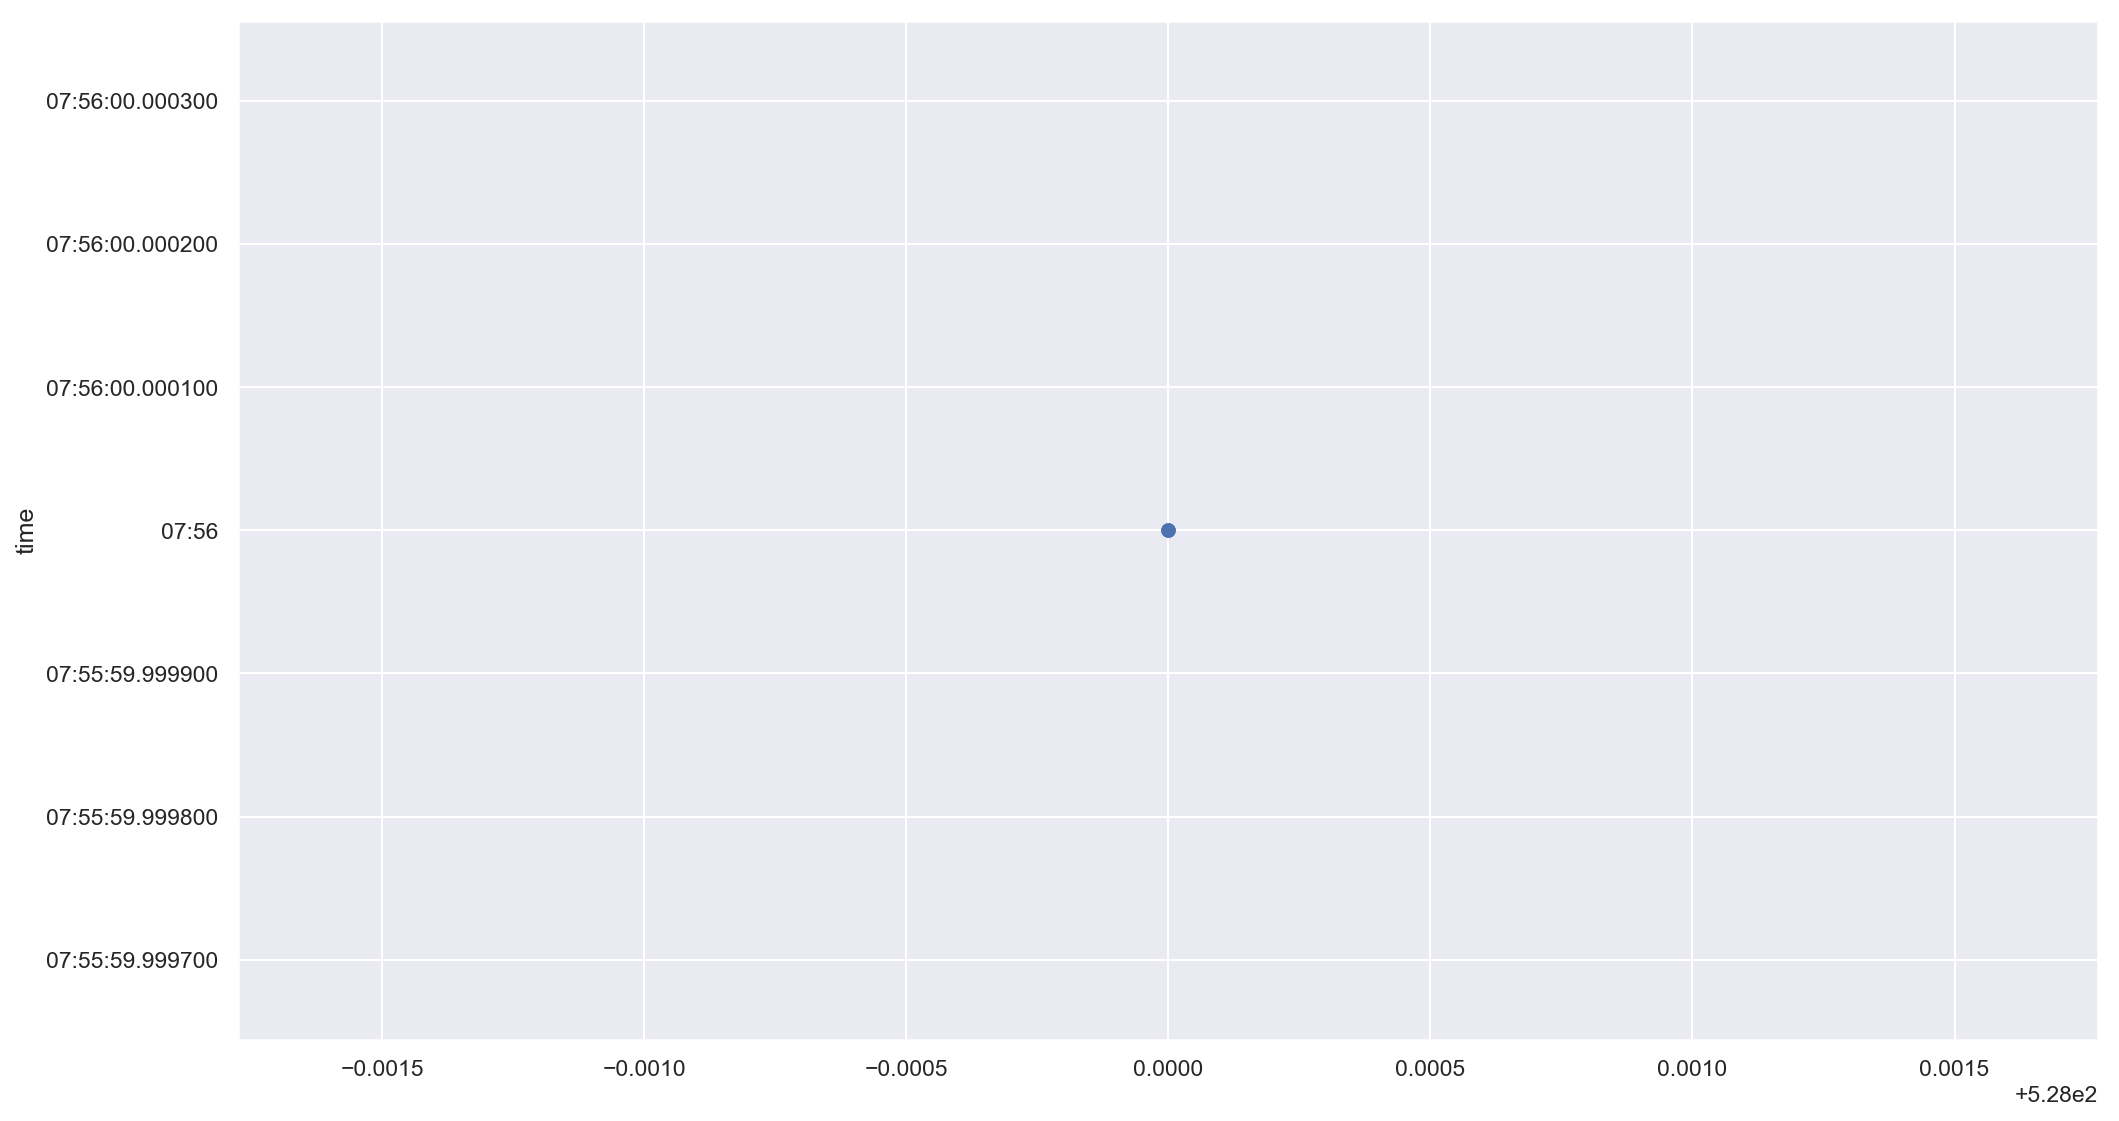

In [187]:
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df.query('StopName == "Main and Schiller IB"')

df_temp['Time'] = [datetime.datetime.time(d) for d in df_temp['DateTime']]

df_temp = df_temp.set_index('Time')

df_temp1 = df_temp[7:9]              

#df_temp = df.query('VehicleID == 21')
#df_temp = df_temp.groupby(['DateTime'], as_index=True).count()

# df_temp1 = df_temp['2018-10-08 07':'2018-10-08 09']
plt.scatter(df_temp1['VehicleID'], df_temp1.index)
#df_temp1


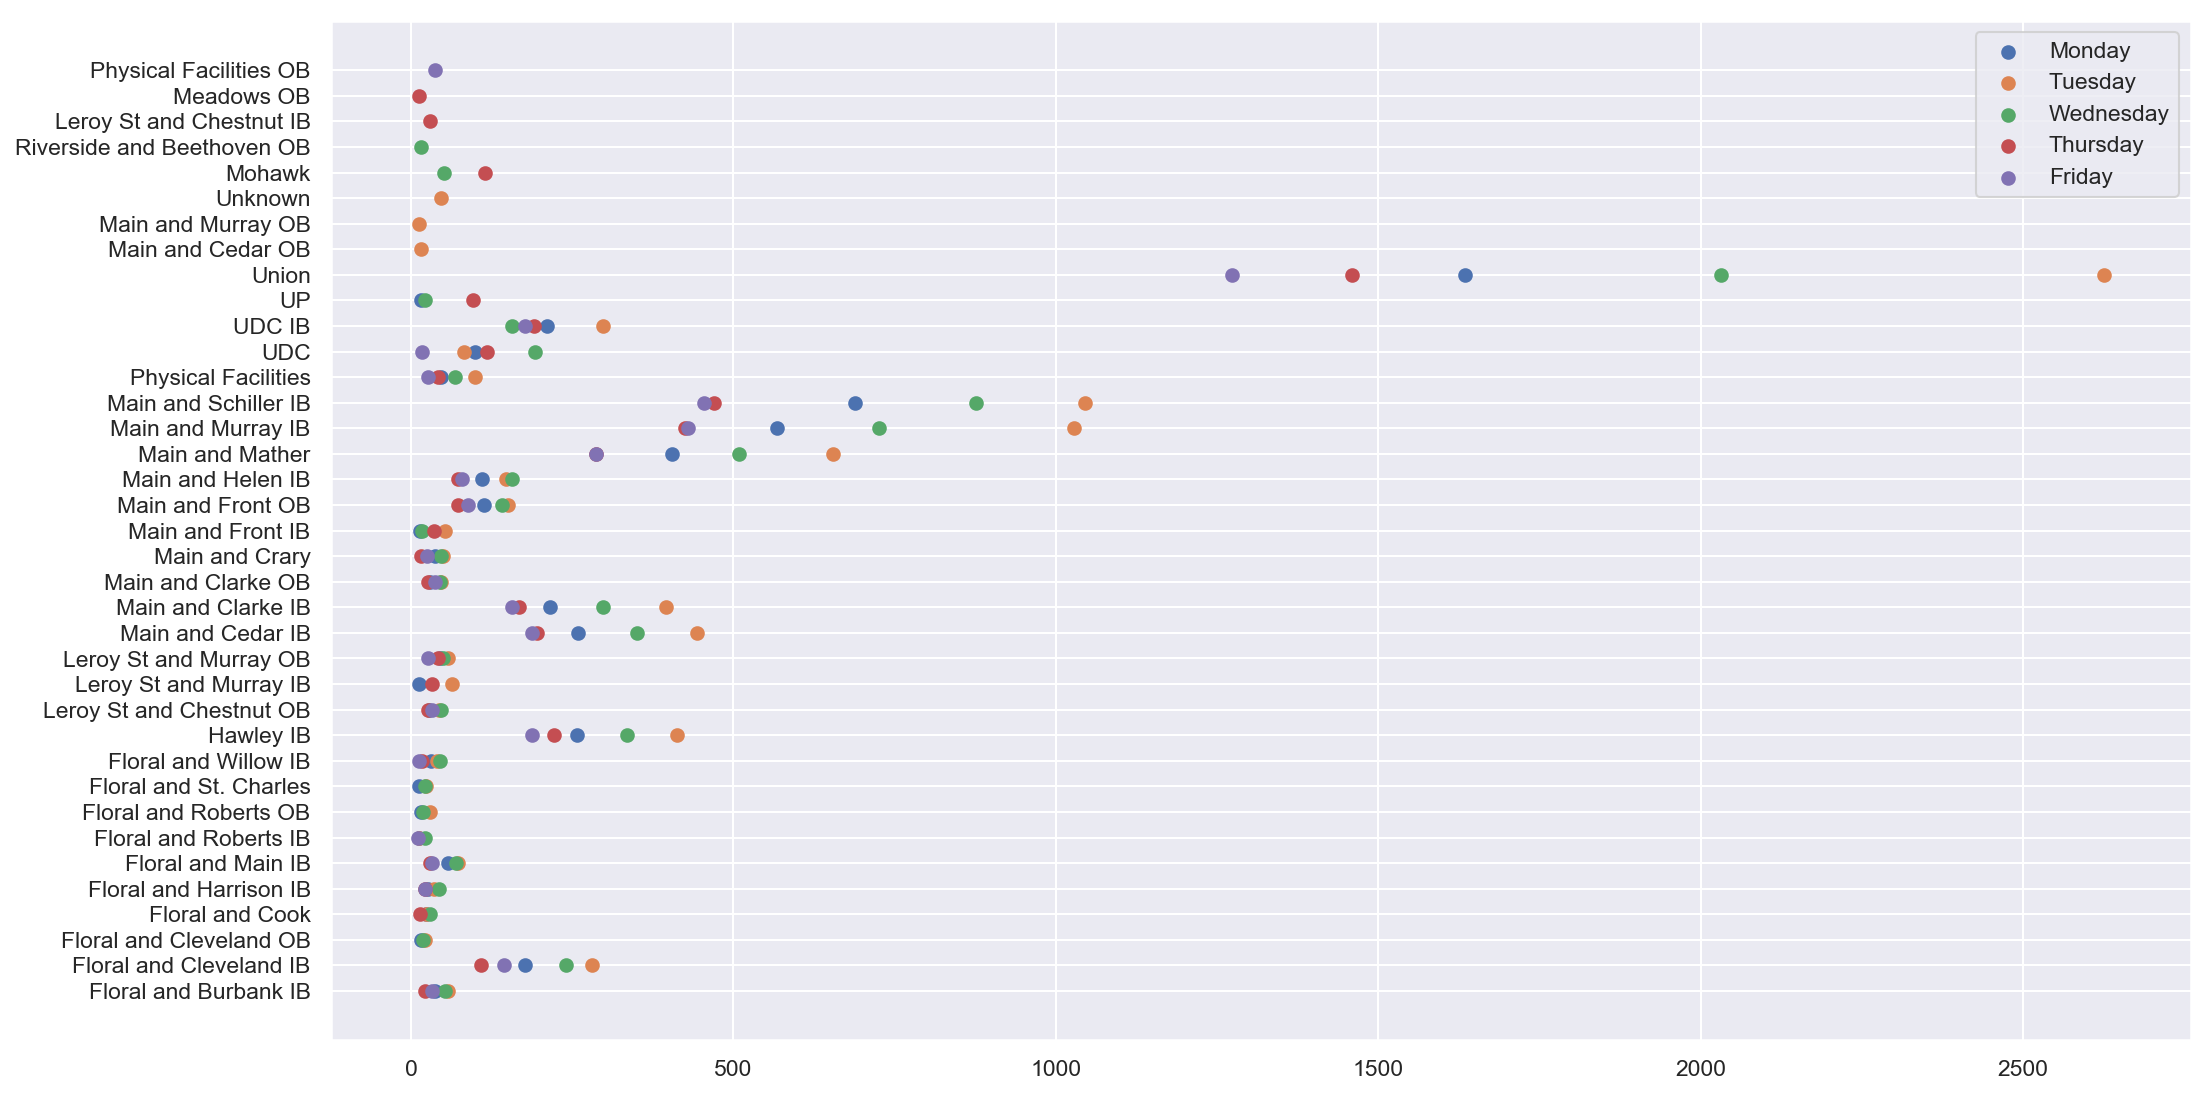

In [224]:
axes.legend(["label1","label2","label3","label4","Label5"])
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df


df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Monday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 10]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Tuesday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 10]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Wednesday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 10]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Thursday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 10]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Friday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 10]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

axes.legend(["Monday","Tuesday","Wednesday","Thursday","Friday"], loc=1)

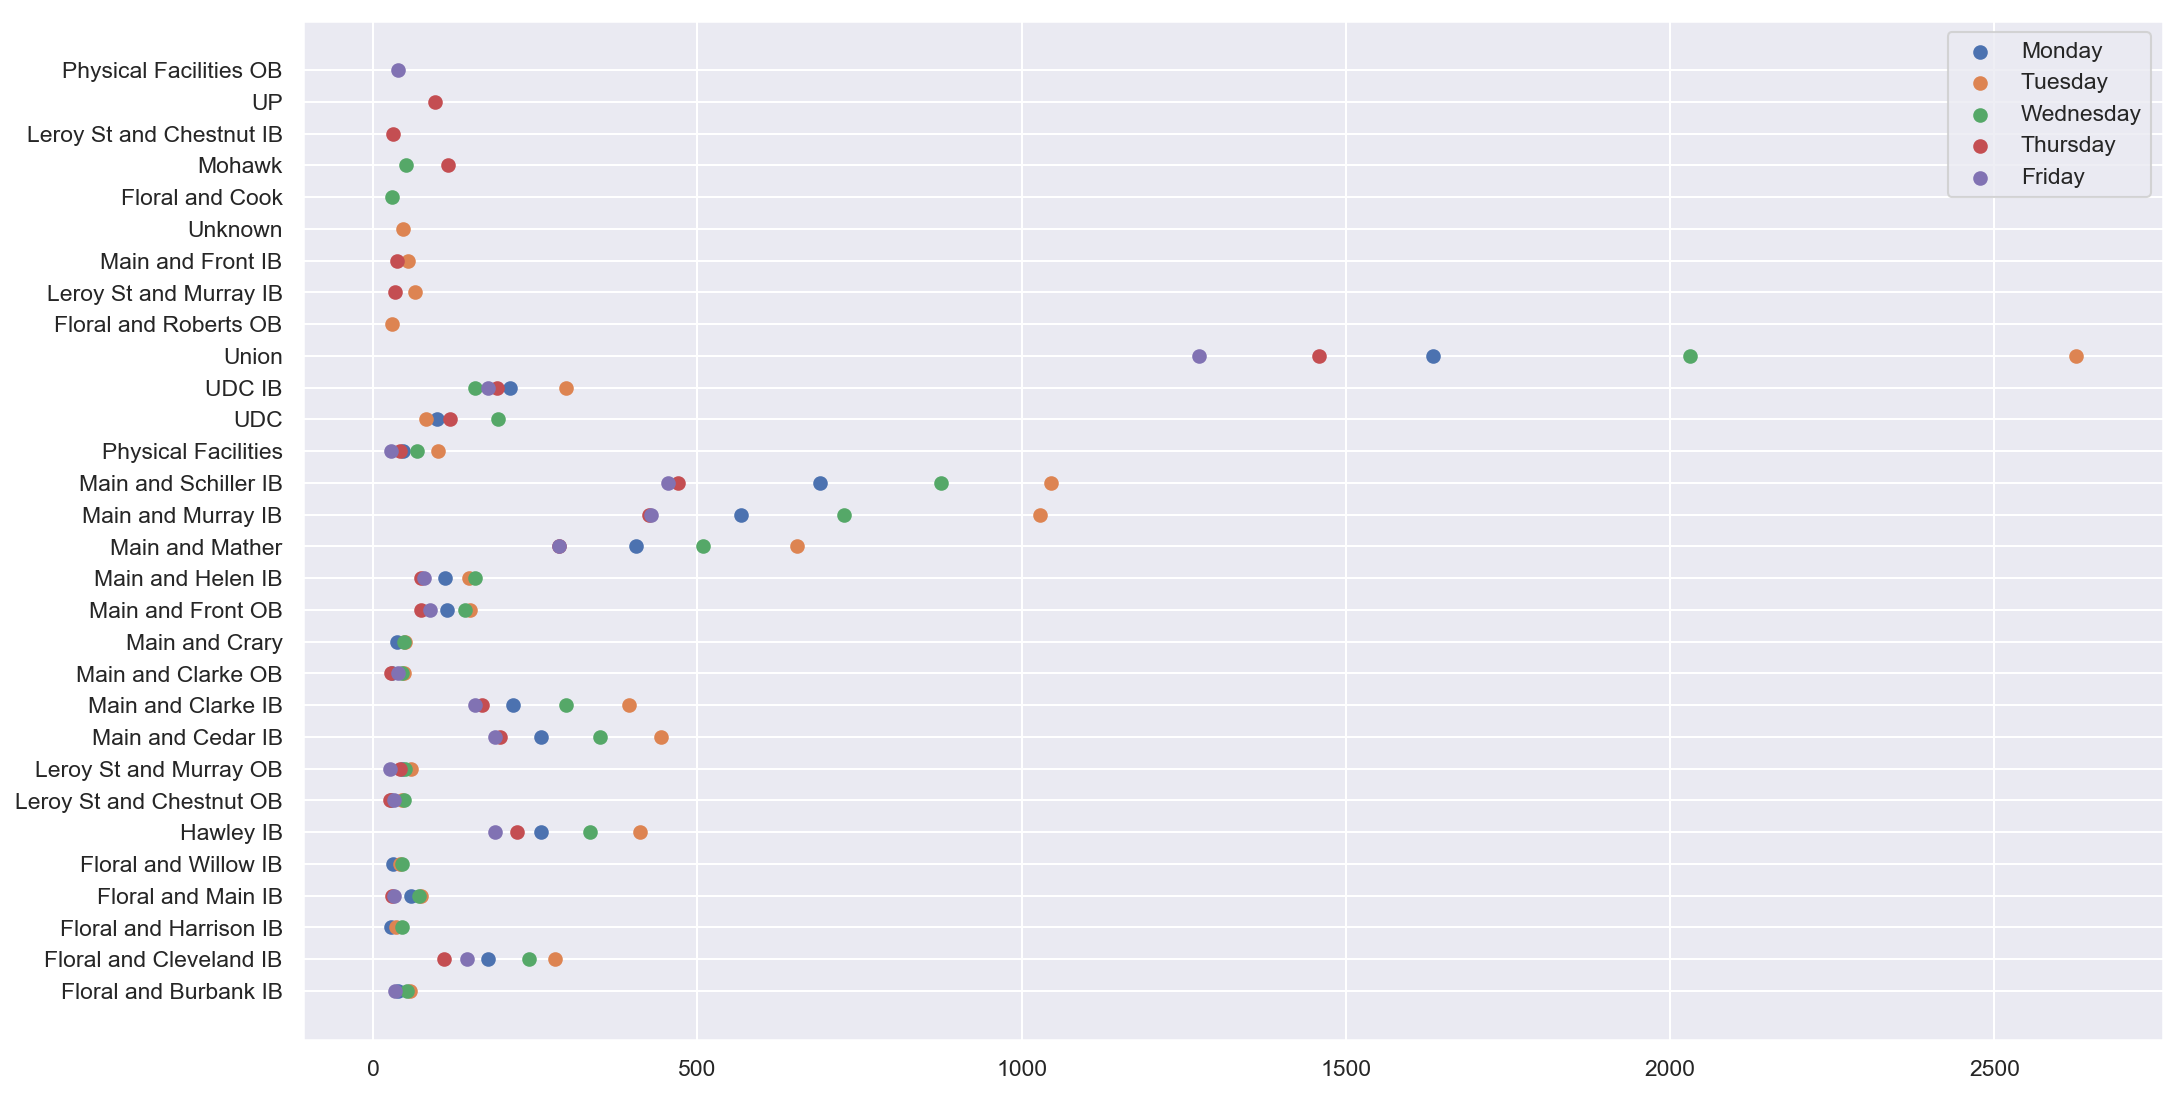

In [229]:
axes.legend(["label1","label2","label3","label4","Label5"])
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df


df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Monday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 25]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Tuesday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 25]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Wednesday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 25]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Thursday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 25]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

df_monday = df_temp[df_temp['DateTime'].dt.day_name() == 'Friday']
df_monday = df_monday.groupby(['StopName'], as_index=False).count()
df_monday = df_monday[df_monday.DateTime > 25]
# df_monday.sort_values(by=['DateTime'])
axes.scatter(df_monday['DateTime'], df_monday['StopName'])

axes.legend(["Monday","Tuesday","Wednesday","Thursday","Friday"], loc=1)
plt.savefig('DCL_OUT.png')

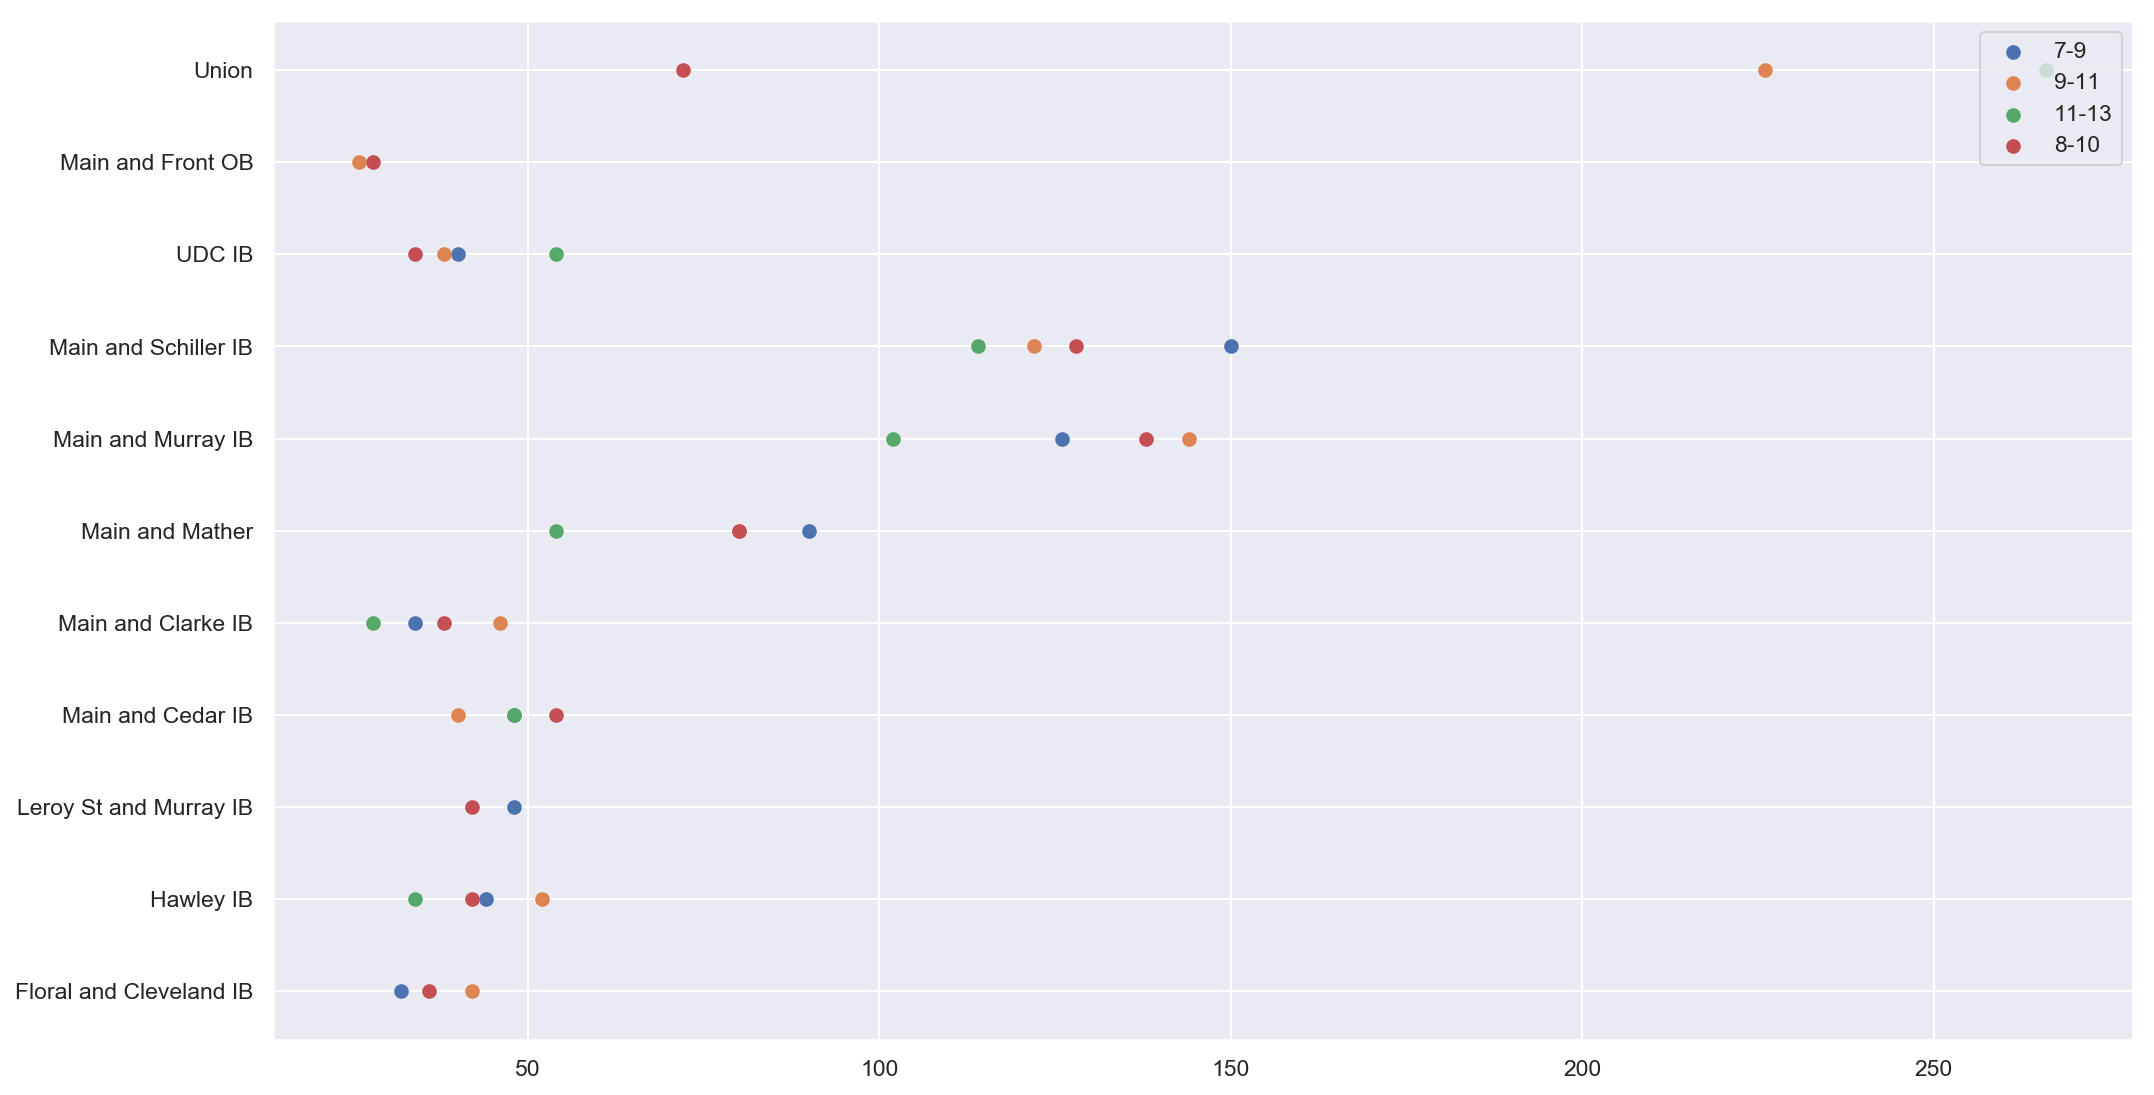

In [251]:
axes.legend(["label1","label2","label3","label4","Label5"])
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df


df_temp = df_temp[df_temp['DateTime'].dt.day_name() == 'Tuesday']

df_temp = df.set_index('DateTime')

df_temp1 = df_temp['2018-10-02 07':'2018-10-02 09']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 09':'2018-10-02 11']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 11':'2018-10-02 13']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 08':'2018-10-02 10']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

axes.legend(["7-9","9-11","11-13","8-10"], loc=1)

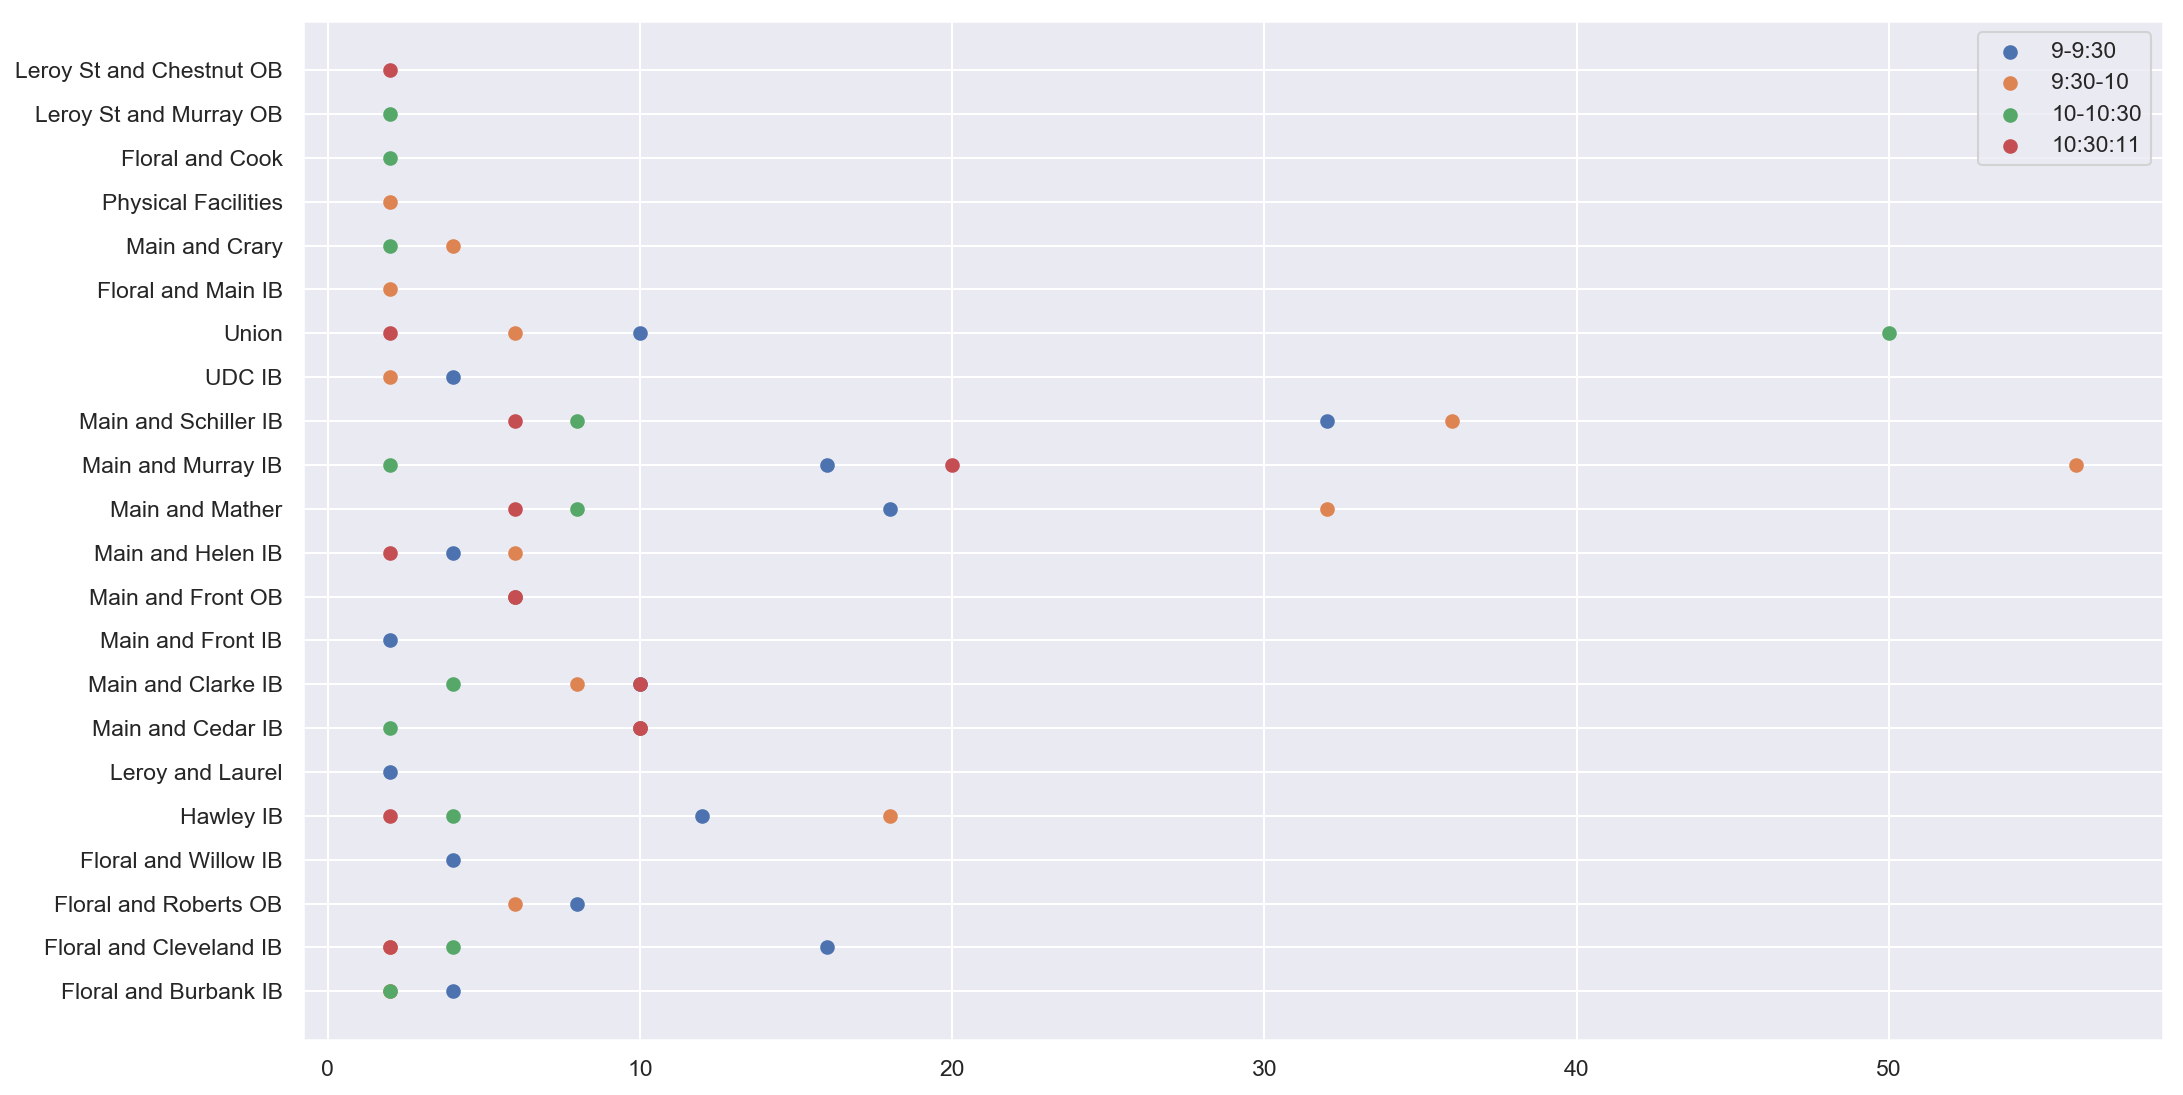

In [255]:
axes.legend(["label1","label2","label3","label4","Label5"])
fig, axes = plt.subplots(figsize=(16,9), dpi=150)

df_temp = df


df_temp = df_temp[df_temp['DateTime'].dt.day_name() == 'Tuesday']#

df_temp = df.set_index('DateTime')

df_temp1 = df_temp['2018-10-02 09:00':'2018-10-02 09:30']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 09:30':'2018-10-02 10:00']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 10:00':'2018-10-02 10:30']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

df_temp1 = df_temp['2018-10-02 10:30':'2018-10-02 11:00']
df_temp1 = df_temp1.groupby(['StopName'], as_index=False).count()
#df_temp1 = df_temp1[df_temp1.CorridorName > 25]
axes.scatter(df_temp1['CorridorName'], df_temp1['StopName'])

axes.legend(["9-9:30","9:30-10","10-10:30","10:30:11"], loc=1)